# Εξόρυξη Δεδομένων με τεχνική Scraping, από το ειδησεογραφικό site News247
# https://www.news247.gr/

Πεδίο Ανάλυσης: **Η Ρήτρα Αναπροσαρμογής της ΔΕΗ**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [3]:
response = requests.get("https://www.news247.gr/ritra-anaprosarmogis")
dei_doc = BeautifulSoup(response.text, 'html.parser')

In [4]:
headlines = dei_doc.find_all('h2')

for headline in headlines:
    print(headline.text)


                ΜΕ ΜΙΑ ΜΑΤΙΑ


                            Χαλκιδική: Συγκλονιστικές περιγραφές για τον 30χρονο τουρίστα - Πώς επιβίωσε 18 ώρες στο νερό



                            Θερινές εκπτώσεις 2022: Ξεκινούν τη Δευτέρα - Πόσο θα διαρκέσουν



                            Κακοκαιρία: Σε κατάσταση έκτακτης ανάγκης η Σκύρος - Προβλήματα σε Σκιάθο και Θάσο





Ρήτρα αναπροσαρμογής: Παρατείνεται η απαγόρευση διακοπής ρεύματος στους ευάλωτους


Ρήτρα αναπροσαρμογής: Στη Βουλή η αναστολή της και το πλαφόν στη χονδρική


Τσίπρας: Εμπαιγμός η δήθεν κατάργηση της ρήτρας αναπροσαρμογής


Ρήτρα αναπροσαρμογής: "Δεν καταργείται, απλά αλλάζει όνομα" λέει το ΙΝΚΑ


Ρήτρα αναπροσαρμογής: "Όχι" στην πιλοτική δίκη λέει ο Άρειος Πάγος


Χαρίτσης: "Διορισμένοι από τη ΝΔ διαφωνούν ανοιχτά με την κυβερνητική πολιτική"


Δύο Έλληνες έφτιαξαν εφαρμογή που προβλέπει την κατανάλωση ρεύματος και η ιδέα τους έφτασε στο MIT 


Λογαριασμοί ρεύματος: Αλλαγές στα τιμολόγια κάθε μήνα μετά την αναστολή της ρή

In [5]:
links = dei_doc.select("h2 a") 
links

[<a href="https://www.news247.gr/koinonia/chalkidiki-sygklonistikes-perigrafes-30chronos-agnooymenos-toyristas-ivan-pos-epiviose-18-ores-nero.9692278.html" title="Χαλκιδική: Συγκλονιστικές περιγραφές για τον 30χρονο τουρίστα - Πώς επιβίωσε 18 ώρες στο νερό">
                             Χαλκιδική: Συγκλονιστικές περιγραφές για τον 30χρονο τουρίστα - Πώς επιβίωσε 18 ώρες στο νερό</a>,
 <a href="https://www.news247.gr/koinonia/therines-ekptoseis-2022-xekinoyn-ti-deytera-poso-tha-diarkesoyn-poia-kyriaki-tha-einai-anoichta-ta-katastimata.9692158.html" title="Θερινές εκπτώσεις 2022: Ξεκινούν τη Δευτέρα - Πόσο θα διαρκέσουν">
                             Θερινές εκπτώσεις 2022: Ξεκινούν τη Δευτέρα - Πόσο θα διαρκέσουν</a>,
 <a href="https://www.news247.gr/koinonia/kakokairia-se-katastasi-ektaktis-anagkis-i-skyros-provlimata-se-skiatho-kai-thaso.9692010.html" title="Κακοκαιρία: Σε κατάσταση έκτακτης ανάγκης η Σκύρος - Προβλήματα σε Σκιάθο και Θάσο">
                             Κακοκαιρία: Σε

In [6]:
urls = [link['href'] for link in links]
urls

['https://www.news247.gr/koinonia/chalkidiki-sygklonistikes-perigrafes-30chronos-agnooymenos-toyristas-ivan-pos-epiviose-18-ores-nero.9692278.html',
 'https://www.news247.gr/koinonia/therines-ekptoseis-2022-xekinoyn-ti-deytera-poso-tha-diarkesoyn-poia-kyriaki-tha-einai-anoichta-ta-katastimata.9692158.html',
 'https://www.news247.gr/koinonia/kakokairia-se-katastasi-ektaktis-anagkis-i-skyros-provlimata-se-skiatho-kai-thaso.9692010.html',
 'https://www.news247.gr/koinonia/ritra-anaprosarmogis-parateinetai-i-apagoreysi-diakopis-reymatos-stoys-eyalotoys.9688731.html',
 'https://www.news247.gr/politiki/ritra-anaprosarmogis-sti-voyli-i-anastoli-tis-kai-to-plafon-sti-chondriki.9680740.html',
 'https://www.news247.gr/politiki/tsipras-empaigmos-i-dithen-katargisi-tis-ritras-anaprosarmogis.9680583.html',
 'https://www.news247.gr/energia/ritra-anaprosarmogis-den-katargeitai-apla-allazei-onoma-leei-to-inka.9679870.html',
 'https://www.news247.gr/koinonia/ritra-anaprosarmogis-ochi-stin-pilotiki-diki

In [7]:
titles = [link.text for link in links]
titles

['\n                            Χαλκιδική: Συγκλονιστικές περιγραφές για τον 30χρονο τουρίστα - Πώς επιβίωσε 18 ώρες στο νερό',
 '\n                            Θερινές εκπτώσεις 2022: Ξεκινούν τη Δευτέρα - Πόσο θα διαρκέσουν',
 '\n                            Κακοκαιρία: Σε κατάσταση έκτακτης ανάγκης η Σκύρος - Προβλήματα σε Σκιάθο και Θάσο',
 'Ρήτρα αναπροσαρμογής: Παρατείνεται η απαγόρευση διακοπής ρεύματος στους ευάλωτους',
 'Ρήτρα αναπροσαρμογής: Στη Βουλή η αναστολή της και το πλαφόν στη χονδρική',
 'Τσίπρας: Εμπαιγμός η δήθεν κατάργηση της ρήτρας αναπροσαρμογής',
 'Ρήτρα αναπροσαρμογής: "Δεν καταργείται, απλά αλλάζει όνομα" λέει το ΙΝΚΑ',
 'Ρήτρα αναπροσαρμογής: "Όχι" στην πιλοτική δίκη λέει ο Άρειος Πάγος',
 'Χαρίτσης: "Διορισμένοι από τη ΝΔ διαφωνούν ανοιχτά με την κυβερνητική πολιτική"',
 'Δύο Έλληνες έφτιαξαν εφαρμογή που προβλέπει την κατανάλωση ρεύματος και η ιδέα τους έφτασε στο MIT ',
 'Λογαριασμοί ρεύματος: Αλλαγές στα τιμολόγια κάθε μήνα μετά την αναστολή της ρήτρας αναπ

In [8]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.news247.gr/ritra-anaprosarmogis?pages="
for i in range(1,20):
    url = base_url + str(i)
    #print(url)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    #print(s)
    links = s.select("h2 a")
    links = set(links)
    
    url = [link['href'] for link in links]
    
    #title = [link.text for link in links]
    
    
    print(url)

    for l in url:
        link = l
        print(l)
        scraped_links.append(l)


    
    # Τυπώνει το νούμερο των links που είναι scraped
print(len(scraped_links)) 

dei_links = (set(scraped_links))

['https://www.news247.gr/koinonia/ritra-anaprosarmogis-parateinetai-i-apagoreysi-diakopis-reymatos-stoys-eyalotoys.9688731.html', 'https://www.news247.gr/politiki/syriza-omologoyn-ti-listeia-me-ti-ritra-anaprosarmogis-kai-etoimazoyn-nea-apati-se-varos-ton-politon.9677504.html', 'https://www.news247.gr/koinonia/ston-areio-pago-i-ritra-anaprosarmogis.9664760.html', 'https://www.news247.gr/energia/elegchoi-apo-ti-rae-stis-ilektrikes-etaireies-gia-tin-efarmogi-tis-ritras-kai-tin-katanomi-ton-epidotiseon.9674905.html', 'https://www.news247.gr/energia/ritra-anaprosarmogis-den-katargeitai-apla-allazei-onoma-leei-to-inka.9679870.html', 'https://www.news247.gr/koinonia/sti-dikaiosyni-i-ritra-anaprosarmogis.9651128.html', 'https://www.news247.gr/politiki/charitsis-i-kyvernisi-den-echei-kanei-tipota-oysiastiko-edo-kai-9-mines-gia-na-antimetopisei-tin-krisi.9626495.html', 'https://www.news247.gr/politiki/staikoyras-tha-kalypsoyme-to-70-80-tis-ayxisis-toy-reymatos-to-2o-examino-toy-2022.9638765.htm

In [9]:
len(dei_links)

70

# Δημιουργία DataFrame

In [10]:
Dei = pd.DataFrame(dei_links, columns= ['url'])

In [11]:
Dei.to_csv("Dei.csv", index=False)
Dei = pd.read_csv('Dei.csv')
Dei

,url
0,https://www.news247.gr/oikonomia/ritra-anapros...
1,https://www.news247.gr/oikonomia/skertsos-neo-...
2,https://www.news247.gr/koinonia/ritra-anaprosa...
3,https://www.news247.gr/politiki/se-politiki-an...
4,https://www.news247.gr/koinonia/ritra-anaprosa...
...,...
65,https://www.news247.gr/koinonia/ekpoizo-katate...
66,https://www.news247.gr/politiki/ritra-anaprosa...
67,https://www.news247.gr/politiki/kinal-ta-komma...
68,https://www.news247.gr/politiki/oikonomoy-se-e...


In [12]:
urls = Dei['url'].tolist()
urls[0:100]

['https://www.news247.gr/oikonomia/ritra-anaprosarmogis-ti-einai-pos-ypologizetai-paradeigmata-apo-toys-parochoys.9613408.html',
 'https://www.news247.gr/oikonomia/skertsos-neo-programma-apo-ton-ioylio-poy-tha-kalyptei-to-85-tis-ritras-anaprosarmogis.9669843.html',
 'https://www.news247.gr/koinonia/ritra-anaprosarmogis-parateinetai-i-apagoreysi-diakopis-reymatos-stoys-eyalotoys.9688731.html',
 'https://www.news247.gr/politiki/se-politiki-anastasi-meso-katotatoy-misthoy-elpizei-i-nd.9604533.html',
 'https://www.news247.gr/koinonia/ritra-anaprosarmogis-patra-apagoreysi-diakopis-reymatos-se-dyo-atoma-poy-eichan-prosfygei-sti-dikaiosyni.9629503.html',
 'https://www.news247.gr/energia/se-akroasi-kalei-i-rae-toys-promitheytes-reymatos-gia-periptoseis-adiafaneias-stis-symvaseis.9613047.html',
 'https://www.news247.gr/politiki/gkrinia-sti-nd-gia-tin-akriveia-oi-psifoforoi-ta-pselnoyn-stoys-voyleytes.9611441.html',
 'https://www.news247.gr/politiki/iliopoylos-i-kyvernisi-syntonizei-to-pliatsiko

In [13]:
len(urls)

70

In [14]:
response = requests.get("https://www.news247.gr/ritra-anaprosarmogis", headers=headers)

doc = BeautifulSoup(response.text)

In [15]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

In [16]:
Dei = pd.DataFrame(columns = ['Title', 'created_at', 'URL', 'text', 'About_text', 'About_URL'])

In [17]:
titles = []#check
links = []#check
authors = [] # authors don't exist
dates = []#check
descs = []#check
abouts_text = []#check
abouts_URL = []#check


for i in range(1,20):
  my_url = 'https://www.news247.gr/ritra-anaprosarmogis?pages='+str(i)
  req = Request(my_url,headers={'User-Agent': 'Mozilla/5.0'})
  # print(my_url)
  raw_html = urlopen(req).read()
  news = BeautifulSoup(raw_html, "html.parser")


  titles_soup = news.find_all("h2", {"class": "article__title bold"})

  # links = news.find_all("h2", {"class": "article__title bold"})
  for title in titles_soup:
    links.append(title.find('a')['href'])
    titles.append((title.text).replace('\n',''))

  abouts_soup = news.find_all("div", {"class": "article__summary"})
  for about in abouts_soup:
    info = (about.text).splitlines()
    # print(info)
    abouts_text.append(info[1])

    descs.append(info[2])

    dates.append(info[3])

    abouts_URL.append(about.find('a')['href'])

print(len(titles))
print(len(links))
print(len(dates))
print(len(descs))
print(len(abouts_text))
print(len(abouts_URL))

67
67
67
67
67
67


In [18]:
for i in range(0, len(titles)):
  Dei = Dei.append({'Title' : titles[i], 'created_at' : dates[i], 'URL' : links[i], 'text' : descs[i], 'About_text' : abouts_text[i], 'About_URL' : abouts_URL[i]}, ignore_index=True)

In [19]:
Dei

,Title,created_at,URL,text,About_text,About_URL
0,Ρήτρα αναπροσαρμογής: Παρατείνεται η απαγόρευσ...,06 Ιουλίου 2022 17:09,https://www.news247.gr/koinonia/ritra-anaprosa...,"Με απόφαση του Πολυμελούς Πρωτοδικείου Αθηνών,...",ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,https://www.news247.gr/ritra-anaprosarmogis
1,Ρήτρα αναπροσαρμογής: Στη Βουλή η αναστολή της...,29 Ιουνίου 2022 09:51,https://www.news247.gr/politiki/ritra-anaprosa...,Στην Ολομέλεια της Βουλής σήμερα η αναστολή τη...,ΗΛΕΚΤΡΙΚΗ ΕΝΕΡΓΕΙΑ,https://www.news247.gr/ilektriki-energeia
2,Τσίπρας: Εμπαιγμός η δήθεν κατάργηση της ρήτρα...,29 Ιουνίου 2022 06:31,https://www.news247.gr/politiki/tsipras-empaig...,Την κυβερνητική προσπάθεια να απαλείψει τη ρήτ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,https://www.news247.gr/ritra-anaprosarmogis
3,"Ρήτρα αναπροσαρμογής: ""Δεν καταργείται, απλά α...",28 Ιουνίου 2022 14:10,https://www.news247.gr/energia/ritra-anaprosar...,Για παραβίαση της ευρωπαϊκής νομοθεσίας κάνει ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,https://www.news247.gr/ritra-anaprosarmogis
4,"Ρήτρα αναπροσαρμογής: ""Όχι"" στην πιλοτική δίκη...",28 Ιουνίου 2022 13:53,https://www.news247.gr/koinonia/ritra-anaprosa...,Υπέρ των καταναλωτικών οργανώσεων και της Ολομ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,https://www.news247.gr/ritra-anaprosarmogis
...,...,...,...,...,...,...
62,"Έρευνα 20/20: ""Δυσκολεύομαι να πληρώσω"" λένε 8...",21 Απριλίου 2022 09:51,https://www.news247.gr/20-20/ereyna-20-20-dysk...,Η ακρίβεια το μεγαλύτερο πρόβλημα της χώρας γι...,ΑΚΡΙΒΕΙΑ,https://www.news247.gr/akriveia
63,"Σε πολιτική ""ανάσταση"" μέσω κατώτατου μισθού ε...",21 Απριλίου 2022 06:07,https://www.news247.gr/politiki/se-politiki-an...,Η επίσπευση των ανακοινώσεων για τον κατώτατο ...,ΑΚΡΙΒΕΙΑ,https://www.news247.gr/akriveia
64,"Βαρουφάκης: ""Τα 50 ευρώ να τα δώσει ο πρωθυπου...",20 Απριλίου 2022 20:56,https://www.news247.gr/politiki/varoyfakis-ta-...,Σκληρή κριτική στις ανακοινώσεις του Κυριάκου ...,ΓΙΑΝΗΣ ΒΑΡΟΥΦΑΚΗΣ,https://www.news247.gr/varoufakis
65,Σταϊκούρας - Καύσιμα: Παράταση στην πλατφόρμα ...,20 Απριλίου 2022 12:42,https://www.news247.gr/oikonomia/staikoyras-ka...,Σημαντικά μειωμένος θα είναι ο νέος ΕΝΦΙΑ σύμφ...,ΧΡΗΣΤΟΣ ΣΤΑΪΚΟΥΡΑΣ,https://www.news247.gr/christos-staikoyras


In [20]:
Dei.dtypes

Title         object
created_at    object
URL           object
text          object
About_text    object
About_URL     object
dtype: object

In [21]:
Dei_doc = Dei[['Title','created_at', 'URL', 'text', 'About_text',  ]]
Dei_doc

,Title,created_at,URL,text,About_text
0,Ρήτρα αναπροσαρμογής: Παρατείνεται η απαγόρευσ...,06 Ιουλίου 2022 17:09,https://www.news247.gr/koinonia/ritra-anaprosa...,"Με απόφαση του Πολυμελούς Πρωτοδικείου Αθηνών,...",ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ
1,Ρήτρα αναπροσαρμογής: Στη Βουλή η αναστολή της...,29 Ιουνίου 2022 09:51,https://www.news247.gr/politiki/ritra-anaprosa...,Στην Ολομέλεια της Βουλής σήμερα η αναστολή τη...,ΗΛΕΚΤΡΙΚΗ ΕΝΕΡΓΕΙΑ
2,Τσίπρας: Εμπαιγμός η δήθεν κατάργηση της ρήτρα...,29 Ιουνίου 2022 06:31,https://www.news247.gr/politiki/tsipras-empaig...,Την κυβερνητική προσπάθεια να απαλείψει τη ρήτ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ
3,"Ρήτρα αναπροσαρμογής: ""Δεν καταργείται, απλά α...",28 Ιουνίου 2022 14:10,https://www.news247.gr/energia/ritra-anaprosar...,Για παραβίαση της ευρωπαϊκής νομοθεσίας κάνει ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ
4,"Ρήτρα αναπροσαρμογής: ""Όχι"" στην πιλοτική δίκη...",28 Ιουνίου 2022 13:53,https://www.news247.gr/koinonia/ritra-anaprosa...,Υπέρ των καταναλωτικών οργανώσεων και της Ολομ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ
...,...,...,...,...,...
62,"Έρευνα 20/20: ""Δυσκολεύομαι να πληρώσω"" λένε 8...",21 Απριλίου 2022 09:51,https://www.news247.gr/20-20/ereyna-20-20-dysk...,Η ακρίβεια το μεγαλύτερο πρόβλημα της χώρας γι...,ΑΚΡΙΒΕΙΑ
63,"Σε πολιτική ""ανάσταση"" μέσω κατώτατου μισθού ε...",21 Απριλίου 2022 06:07,https://www.news247.gr/politiki/se-politiki-an...,Η επίσπευση των ανακοινώσεων για τον κατώτατο ...,ΑΚΡΙΒΕΙΑ
64,"Βαρουφάκης: ""Τα 50 ευρώ να τα δώσει ο πρωθυπου...",20 Απριλίου 2022 20:56,https://www.news247.gr/politiki/varoyfakis-ta-...,Σκληρή κριτική στις ανακοινώσεις του Κυριάκου ...,ΓΙΑΝΗΣ ΒΑΡΟΥΦΑΚΗΣ
65,Σταϊκούρας - Καύσιμα: Παράταση στην πλατφόρμα ...,20 Απριλίου 2022 12:42,https://www.news247.gr/oikonomia/staikoyras-ka...,Σημαντικά μειωμένος θα είναι ο νέος ΕΝΦΙΑ σύμφ...,ΧΡΗΣΤΟΣ ΣΤΑΪΚΟΥΡΑΣ


In [22]:
Dei_doc['Year'] = Dei_doc.created_at.apply(lambda dt: dt.split(' ')[2])
Dei_doc['Month'] = Dei_doc.created_at.apply(lambda dt: dt.split(' ')[1])
Dei_doc['Day'] = Dei_doc.created_at.apply(lambda dt: dt.split(' ')[0])
Dei_doc['Time'] = Dei_doc.created_at.apply(lambda dt: dt.split(' ')[3])

months = {
    'Ιανουαρίου' : '01',
    'Φεβρουαρίου' : '02', 
    'Μαρτίου' : '03',
    'Απριλίου' : '04',
    'Μαΐου' : '05',
    'Ιουνίου': '06',
    'Ιουλίου' : '07',
    'Αυγούστου' : '08',
    'Σεπτεμβρίου' : '09',
    'Οκτωβρίου' : '10',
    'Νοεμβρίου' : '11',
    'Δεκεμβρίου' : '12',
     
}

Dei_doc['Date'] = Dei_doc.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
Dei_doc['Date'] = pd.to_datetime(Dei_doc['Date'])


Dei_doc

,Title,created_at,URL,text,About_text,Year,Month,Day,Time,Date
0,Ρήτρα αναπροσαρμογής: Παρατείνεται η απαγόρευσ...,06 Ιουλίου 2022 17:09,https://www.news247.gr/koinonia/ritra-anaprosa...,"Με απόφαση του Πολυμελούς Πρωτοδικείου Αθηνών,...",ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουλίου,06,17:09,2022-07-06 17:09:00
1,Ρήτρα αναπροσαρμογής: Στη Βουλή η αναστολή της...,29 Ιουνίου 2022 09:51,https://www.news247.gr/politiki/ritra-anaprosa...,Στην Ολομέλεια της Βουλής σήμερα η αναστολή τη...,ΗΛΕΚΤΡΙΚΗ ΕΝΕΡΓΕΙΑ,2022,Ιουνίου,29,09:51,2022-06-29 09:51:00
2,Τσίπρας: Εμπαιγμός η δήθεν κατάργηση της ρήτρα...,29 Ιουνίου 2022 06:31,https://www.news247.gr/politiki/tsipras-empaig...,Την κυβερνητική προσπάθεια να απαλείψει τη ρήτ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουνίου,29,06:31,2022-06-29 06:31:00
3,"Ρήτρα αναπροσαρμογής: ""Δεν καταργείται, απλά α...",28 Ιουνίου 2022 14:10,https://www.news247.gr/energia/ritra-anaprosar...,Για παραβίαση της ευρωπαϊκής νομοθεσίας κάνει ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουνίου,28,14:10,2022-06-28 14:10:00
4,"Ρήτρα αναπροσαρμογής: ""Όχι"" στην πιλοτική δίκη...",28 Ιουνίου 2022 13:53,https://www.news247.gr/koinonia/ritra-anaprosa...,Υπέρ των καταναλωτικών οργανώσεων και της Ολομ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουνίου,28,13:53,2022-06-28 13:53:00
...,...,...,...,...,...,...,...,...,...,...
62,"Έρευνα 20/20: ""Δυσκολεύομαι να πληρώσω"" λένε 8...",21 Απριλίου 2022 09:51,https://www.news247.gr/20-20/ereyna-20-20-dysk...,Η ακρίβεια το μεγαλύτερο πρόβλημα της χώρας γι...,ΑΚΡΙΒΕΙΑ,2022,Απριλίου,21,09:51,2022-04-21 09:51:00
63,"Σε πολιτική ""ανάσταση"" μέσω κατώτατου μισθού ε...",21 Απριλίου 2022 06:07,https://www.news247.gr/politiki/se-politiki-an...,Η επίσπευση των ανακοινώσεων για τον κατώτατο ...,ΑΚΡΙΒΕΙΑ,2022,Απριλίου,21,06:07,2022-04-21 06:07:00
64,"Βαρουφάκης: ""Τα 50 ευρώ να τα δώσει ο πρωθυπου...",20 Απριλίου 2022 20:56,https://www.news247.gr/politiki/varoyfakis-ta-...,Σκληρή κριτική στις ανακοινώσεις του Κυριάκου ...,ΓΙΑΝΗΣ ΒΑΡΟΥΦΑΚΗΣ,2022,Απριλίου,20,20:56,2022-04-20 20:56:00
65,Σταϊκούρας - Καύσιμα: Παράταση στην πλατφόρμα ...,20 Απριλίου 2022 12:42,https://www.news247.gr/oikonomia/staikoyras-ka...,Σημαντικά μειωμένος θα είναι ο νέος ΕΝΦΙΑ σύμφ...,ΧΡΗΣΤΟΣ ΣΤΑΪΚΟΥΡΑΣ,2022,Απριλίου,20,12:42,2022-04-20 12:42:00


In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
Dei_doc.to_csv("/content/gdrive/My Drive/Colab Notebooks/Dei.tsv", sep='\t')

In [25]:
Dei_doc.dtypes

Title                 object
created_at            object
URL                   object
text                  object
About_text            object
Year                  object
Month                 object
Day                   object
Time                  object
Date          datetime64[ns]
dtype: object

In [26]:
tag_data = Dei_doc.groupby(['About_text']).count()['Title'].sort_values(ascending=False)


Month_data = Dei_doc.groupby(['Month']).count()['Title']
(Month_data,tag_data)

(Month
 Απριλίου    26
 Ιουλίου      1
 Ιουνίου     21
 Μαΐου       19
 Name: Title, dtype: int64, About_text
 ΗΛΕΚΤΡΙΚΗ ΕΝΕΡΓΕΙΑ      14
 ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ    12
 ΣΥ.ΡΙΖ.Α.                6
 ΔΕΗ                      5
 ΑΚΡΙΒΕΙΑ                 4
 ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ           3
 ΒΑΣΙΛΗΣ ΟΙΚΟΝΟΜΟΥ        3
 ΓΙΑΝΝΗΣ ΟΙΚΟΝΟΜΟΥ        3
 ΧΡΗΣΤΟΣ ΣΤΑΪΚΟΥΡΑΣ       2
 ΒΟΥΛΗ                    2
 ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ      2
 ΝΑΣΟΣ ΗΛΙΟΠΟΥΛΟΣ         1
 ΧΑΡΙΤΣΗΣ                 1
 ΣΥΝΕΔΡΙΟ ΝΔ              1
 ΣΤΕΛΙΟΣ ΠΕΤΣΑΣ           1
 ΑΔΩΝΙΣ ΓΕΩΡΓΙΑΔΗΣ        1
 ΚΩΝΣΤΑΝΤΙΝΟΣ ΣΚΡΕΚΑΣ     1
 ΚΥΒΕΡΝΗΣΗ                1
 ΚΙΝΗΜΑ ΑΛΛΑΓΗΣ           1
 ΓΙΑΝΗΣ ΒΑΡΟΥΦΑΚΗΣ        1
 ΑΛΕΞΗΣ ΧΑΡΙΤΣΗΣ          1
 ΚΟΜΙΣΙΟΝ                 1
 Name: Title, dtype: int64)

# Γραφήματα

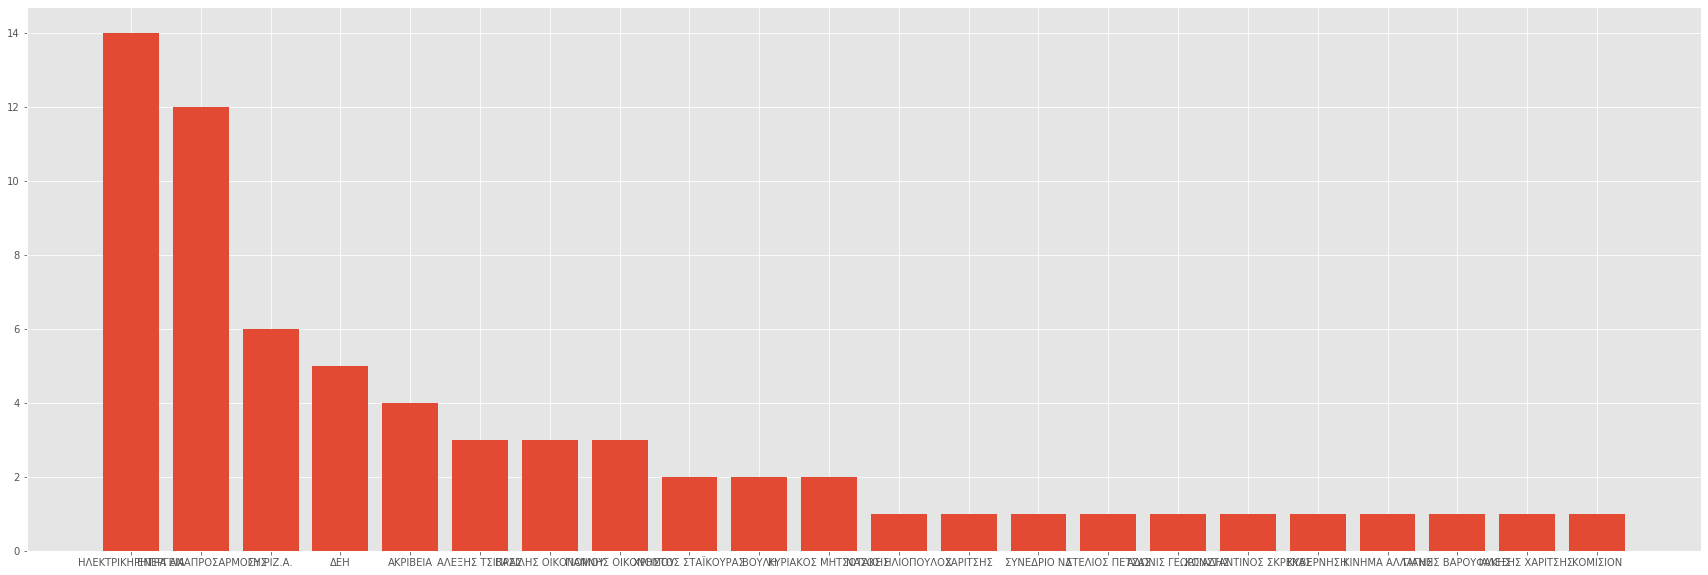

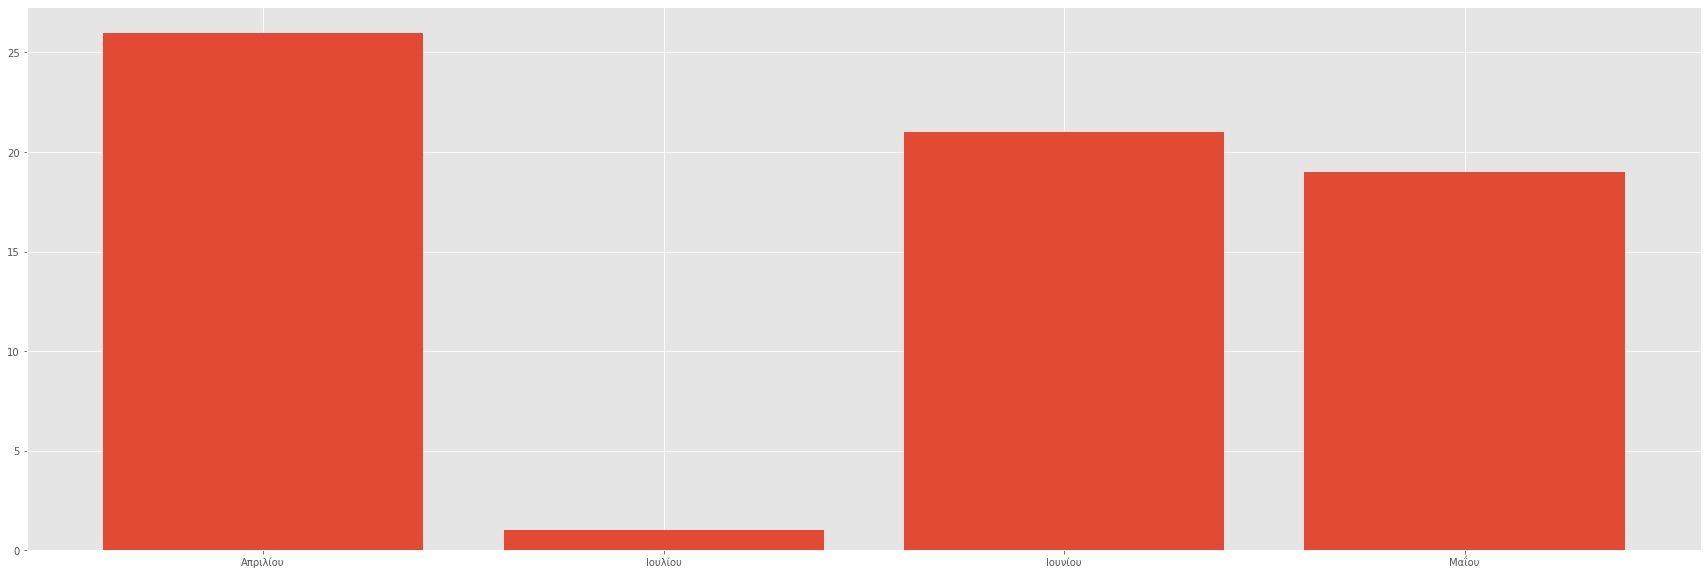

In [27]:
plt.figure(figsize=(30,10))
plt.bar(tag_data.keys(),tag_data)
plt.show()

plt.figure(figsize=(30,10))
plt.bar(Month_data.keys(),Month_data)
plt.show()

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

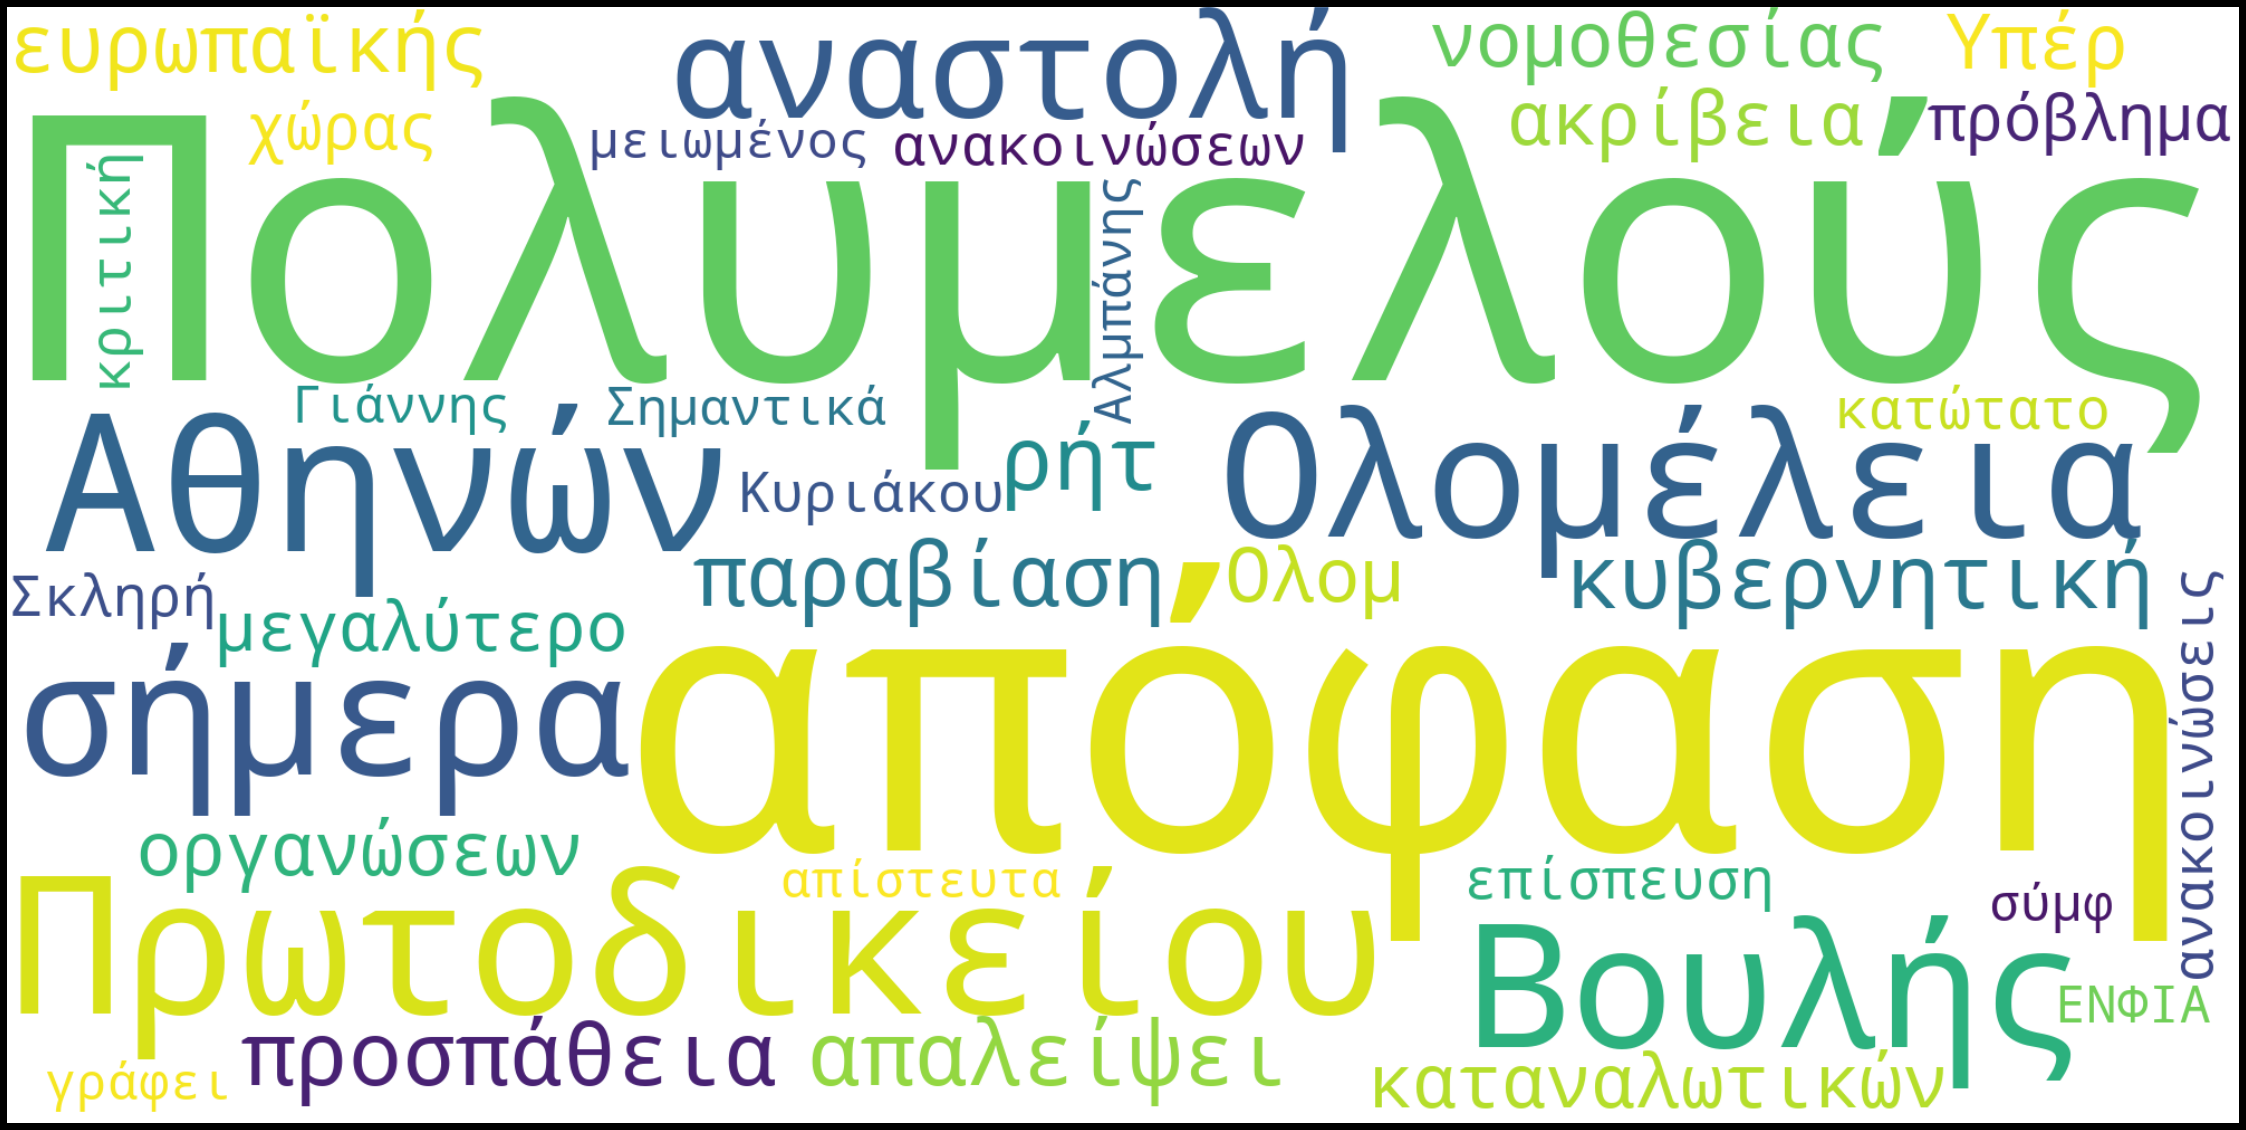

In [29]:
text = Dei_doc.text
stop = stopwords.words('greek')
stop = stop + ['και', 'είναι', 'της','αλλά', 'τη', 'name', 'dtype', 'για', 'στις', 'text', 'length', 'γραφ', 'γι', 'τους', 'object', 'συμφ', 'νέος', 'κάνει', 'γράφ', 'από', 'έχει', 'νέα', 'λόγο', 'ότι','πως']

# Word cloud image:
wordcloud = WordCloud(stopwords=stop, width = 2000, height = 1000, background_color = 'white').generate(str(text))

fig = plt.figure( figsize = (40, 30), facecolor = 'k', edgecolor = 'k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:

word_count = Counter(" ".join(Dei_doc["text"]).split())
word_count = {word.lower() : count for word, count in word_count.items() if not word.lower() in stop}
word_count = pd.DataFrame(data={
    'word': word_count.keys(),
    'count': word_count.values()
})

word_count.sort_values('count',ascending=False).head(15)


,word,count
10,ρεύματος,10
33,ρεύμα,7
0,απόφαση,6
358,πρωθυπουργός,5
16,αναστολή,5
349,συριζα,5
45,κυβέρνησης,5
143,περιβάλλοντος,4
64,δεη,4
334,μέτρα,4


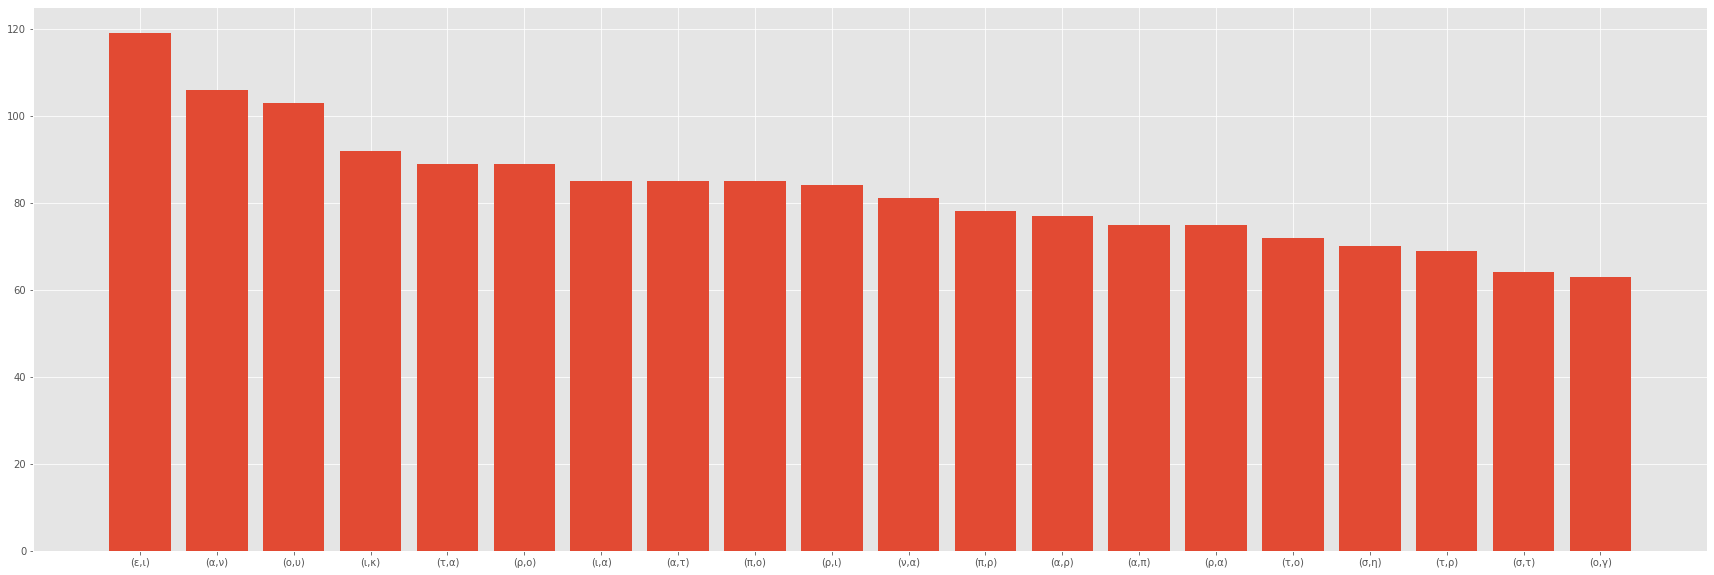

In [31]:
words = sum([row.split(' ') for row in text],[])
words = ''.join([word.lower().strip('"').strip('.') for word in words if word not in stop and len(word) >= 2])


digrams = pd.DataFrame(list(nltk.ngrams(words, 2)))

digrams['digram'] = [f'({x},{y})' for (x,y) in list(zip(list(digrams[0]),list(digrams[1])))]

digrams = digrams.groupby(['digram']).count()[0].sort_values(ascending=False).head(20)


plt.figure(figsize=(30,10))
plt.bar(digrams.keys(),digrams.values)
plt.show()

In [32]:
Dei_doc.resample(rule='D',on='Date').count()

,Title,created_at,URL,text,About_text,Year,Month,Day,Time,Date
Date,,,,,,,,,,
2022-04-20,3,3,3,3,3,3,3,3,3,3
2022-04-21,2,2,2,2,2,2,2,2,2,2
2022-04-22,0,0,0,0,0,0,0,0,0,0
2022-04-23,0,0,0,0,0,0,0,0,0,0
2022-04-24,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2022-07-02,0,0,0,0,0,0,0,0,0,0
2022-07-03,0,0,0,0,0,0,0,0,0,0
2022-07-04,0,0,0,0,0,0,0,0,0,0


In [33]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)
emolex_df.tail(15)

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13146,13156,μαραμενο,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13147,13157,αλιμονο,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
13148,13158,επιδεινωνεται,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
13149,13159,αποσπω βιαια,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13150,13160,καρπος του χεριου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13151,13161,κλητηριο ενταλμα,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13152,13162,κατειργασμενος,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13153,13163,μαγια,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13154,13164,κιτρινο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13155,13165,κιτρινιζω,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= stop,
                      ngram_range=(1, 2),
                      lowercase = True
                      )
matrix = vec.fit_transform(Dei_doc['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.shape


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αι', 'αλλ', 'αλλος', 'αλλοσ', 'αμα', 'απ', 'αρα', 'αυ', 'αυτος', 'αφ', 'γαρ', 'γουν', 'δαι', 'δαις', 'δαισ', 'δη', 'δι', 'δια', 'εαυτου', 'εγω', 'ει', 'ειμι', 'εις', 'εισ', 'ειτε', 'εκ', 'εμος', 'εμοσ', 'εν', 'εξ', 'επει', 'εστι', 'ετι', 'εφ', 'εχει', 'ης', 'ινα', 'καιτοι', 'καν', 'κανει', 'λογο', 'μεν', 'μητε', 'νεα', 'νεος', 'οδε', 'οθεν', 'οις', 'ον', 'οπερ', 'ος', 'οσ', 'οστις', 'οστισ', 'οτε', 'ου', 'ουδ', 'ουδε', 'ουδεις', 'ουδεισ', 'ουδεν', 'ουκ', 'ουν', 'ους', 'ουτε', 'ουτος', 'ουτοσ', 'ουτω', 'ουτως', 'ουτωσ', 'ουχ', 'ουχι', 'περι', 'προ

(67, 13161)

In [35]:
# anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']


# positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']


# sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']


# joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']


# fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [36]:
Dei_doc['anger'] = wordcount_df[angry_words].sum(axis=1)
Dei_doc['positivity'] = wordcount_df[positive_words].sum(axis=1)
Dei_doc['joy'] = wordcount_df[joy_words].sum(axis=1)
Dei_doc['disgust'] = wordcount_df[disgust_words].sum(axis=1)
Dei_doc['surprise'] = wordcount_df[surprise_words].sum(axis=1)
Dei_doc['trust'] = wordcount_df[trust_words].sum(axis=1)
Dei_doc['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
Dei_doc['sadness'] = wordcount_df[sadness_words].sum(axis=1)
Dei_doc['negative'] = wordcount_df[negative_words].sum(axis=1)
Dei_doc['fear'] = wordcount_df[fear_words].sum(axis=1)
Dei_doc

,Title,created_at,URL,text,About_text,Year,Month,Day,Time,Date,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,Ρήτρα αναπροσαρμογής: Παρατείνεται η απαγόρευσ...,06 Ιουλίου 2022 17:09,https://www.news247.gr/koinonia/ritra-anaprosa...,"Με απόφαση του Πολυμελούς Πρωτοδικείου Αθηνών,...",ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουλίου,06,17:09,2022-07-06 17:09:00,0,0,0,0,0,0,0,0,1,0
1,Ρήτρα αναπροσαρμογής: Στη Βουλή η αναστολή της...,29 Ιουνίου 2022 09:51,https://www.news247.gr/politiki/ritra-anaprosa...,Στην Ολομέλεια της Βουλής σήμερα η αναστολή τη...,ΗΛΕΚΤΡΙΚΗ ΕΝΕΡΓΕΙΑ,2022,Ιουνίου,29,09:51,2022-06-29 09:51:00,0,2,0,0,0,0,0,1,1,0
2,Τσίπρας: Εμπαιγμός η δήθεν κατάργηση της ρήτρα...,29 Ιουνίου 2022 06:31,https://www.news247.gr/politiki/tsipras-empaig...,Την κυβερνητική προσπάθεια να απαλείψει τη ρήτ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουνίου,29,06:31,2022-06-29 06:31:00,0,2,0,0,0,2,0,0,0,0
3,"Ρήτρα αναπροσαρμογής: ""Δεν καταργείται, απλά α...",28 Ιουνίου 2022 14:10,https://www.news247.gr/energia/ritra-anaprosar...,Για παραβίαση της ευρωπαϊκής νομοθεσίας κάνει ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουνίου,28,14:10,2022-06-28 14:10:00,0,0,0,0,0,1,0,0,0,0
4,"Ρήτρα αναπροσαρμογής: ""Όχι"" στην πιλοτική δίκη...",28 Ιουνίου 2022 13:53,https://www.news247.gr/koinonia/ritra-anaprosa...,Υπέρ των καταναλωτικών οργανώσεων και της Ολομ...,ΡΗΤΡΑ ΑΝΑΠΡΟΣΑΡΜΟΓΗΣ,2022,Ιουνίου,28,13:53,2022-06-28 13:53:00,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,"Έρευνα 20/20: ""Δυσκολεύομαι να πληρώσω"" λένε 8...",21 Απριλίου 2022 09:51,https://www.news247.gr/20-20/ereyna-20-20-dysk...,Η ακρίβεια το μεγαλύτερο πρόβλημα της χώρας γι...,ΑΚΡΙΒΕΙΑ,2022,Απριλίου,21,09:51,2022-04-21 09:51:00,0,2,0,0,0,0,1,1,1,1
63,"Σε πολιτική ""ανάσταση"" μέσω κατώτατου μισθού ε...",21 Απριλίου 2022 06:07,https://www.news247.gr/politiki/se-politiki-an...,Η επίσπευση των ανακοινώσεων για τον κατώτατο ...,ΑΚΡΙΒΕΙΑ,2022,Απριλίου,21,06:07,2022-04-21 06:07:00,0,0,0,1,0,0,0,0,0,0
64,"Βαρουφάκης: ""Τα 50 ευρώ να τα δώσει ο πρωθυπου...",20 Απριλίου 2022 20:56,https://www.news247.gr/politiki/varoyfakis-ta-...,Σκληρή κριτική στις ανακοινώσεις του Κυριάκου ...,ΓΙΑΝΗΣ ΒΑΡΟΥΦΑΚΗΣ,2022,Απριλίου,20,20:56,2022-04-20 20:56:00,1,0,0,0,0,0,0,1,1,0
65,Σταϊκούρας - Καύσιμα: Παράταση στην πλατφόρμα ...,20 Απριλίου 2022 12:42,https://www.news247.gr/oikonomia/staikoyras-ka...,Σημαντικά μειωμένος θα είναι ο νέος ΕΝΦΙΑ σύμφ...,ΧΡΗΣΤΟΣ ΣΤΑΪΚΟΥΡΑΣ,2022,Απριλίου,20,12:42,2022-04-20 12:42:00,0,2,1,0,1,0,1,0,0,0


In [37]:
emotions = Dei_doc.resample(rule='D',on='Date').sum()
emotions

,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Date,,,,,,,,,,
2022-04-20,2,2,1,2,1,1,1,2,3,1
2022-04-21,0,2,0,1,0,0,1,1,1,1
2022-04-22,0,0,0,0,0,0,0,0,0,0
2022-04-23,0,0,0,0,0,0,0,0,0,0
2022-04-24,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-07-02,0,0,0,0,0,0,0,0,0,0
2022-07-03,0,0,0,0,0,0,0,0,0,0
2022-07-04,0,0,0,0,0,0,0,0,0,0


In [38]:
Dei_doc.set_index('Date' , inplace=True)

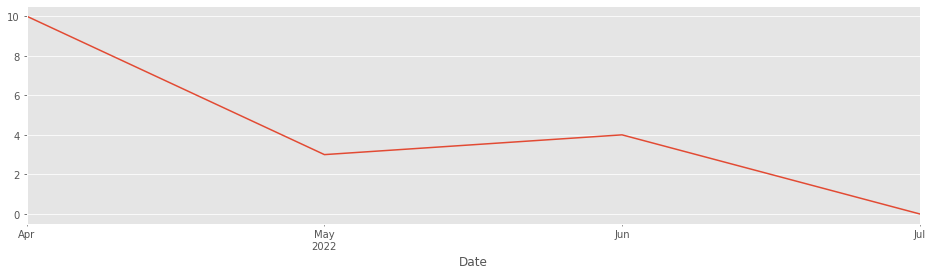

In [39]:
Dei_doc['anger'].resample('M').sum().plot(figsize=(16,4))

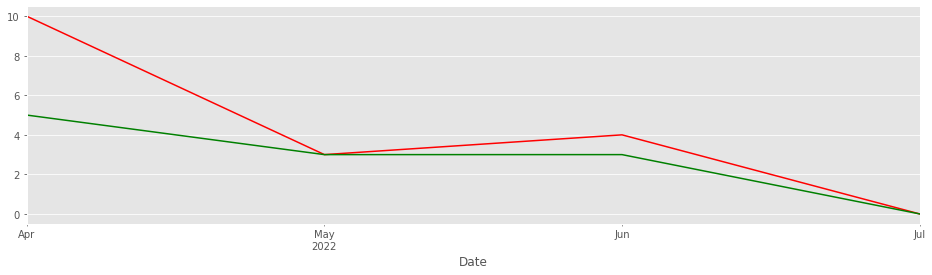

In [40]:
ax = Dei_doc['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
Dei_doc['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

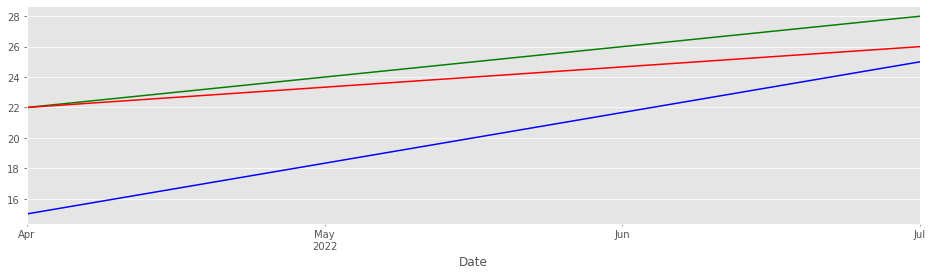

In [41]:
ax = Dei_doc['positivity'].resample('3M').sum().plot(figsize=(16,4), color = 'green')
Dei_doc['negative'].resample('3M').sum().plot(figsize=(16,4), ax = ax, color = 'red')
Dei_doc['trust'].resample('3M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

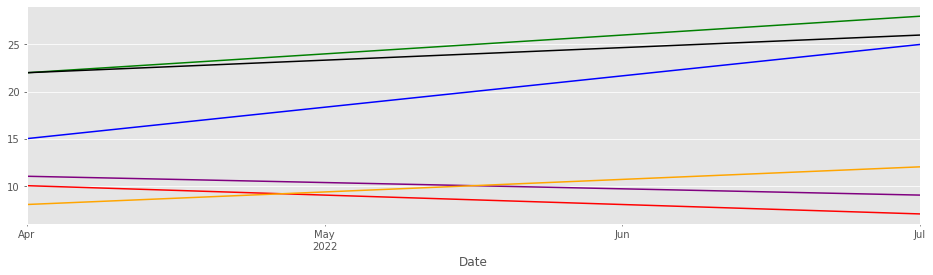

In [42]:
ax = Dei_doc['positivity'].resample('3M').sum().plot(figsize=(16,4), color = 'green')
Dei_doc['anger'].resample('3M').sum().plot(figsize=(16,4), ax = ax, color = 'red')
Dei_doc['trust'].resample('3M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
Dei_doc['disgust'].resample('3M').sum().plot(figsize=(16,4), ax = ax, color = 'purple')
Dei_doc['negative'].resample('3M').sum().plot(figsize=(16,4), ax = ax, color = 'black')
Dei_doc['fear'].resample('3M').sum().plot(figsize=(16,4), ax = ax, color = 'orange')

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

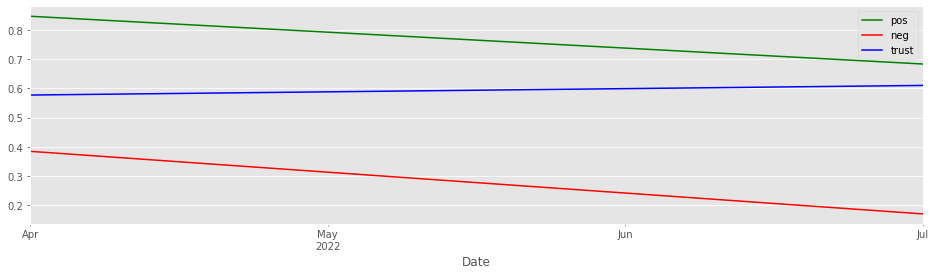

In [44]:
ax = Dei_doc['positivity'].resample('3M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
Dei_doc['anger'].resample('3M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
Dei_doc['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

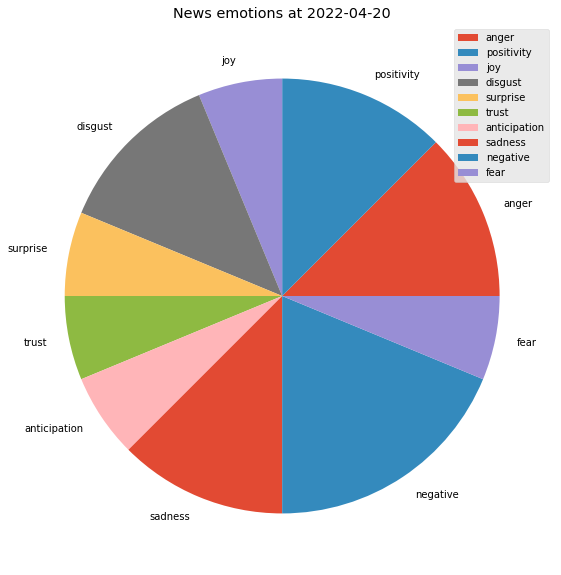

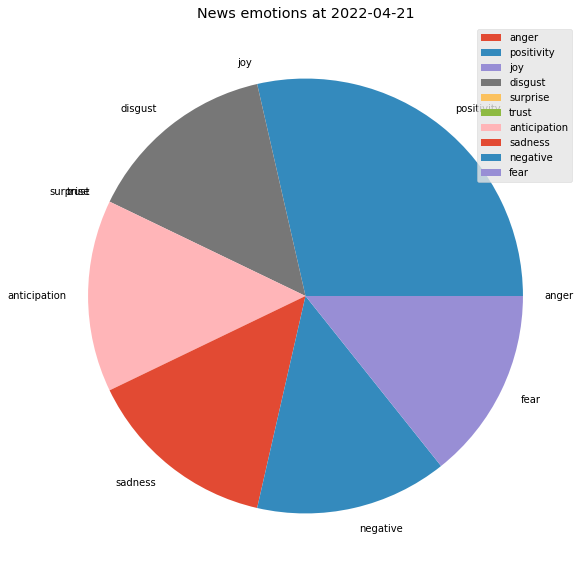

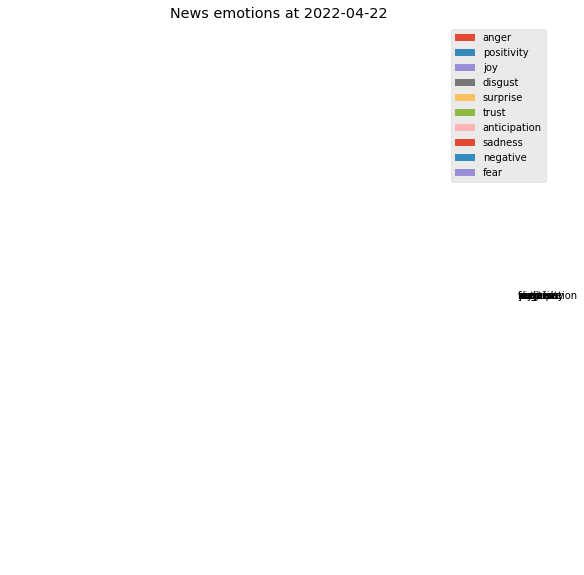

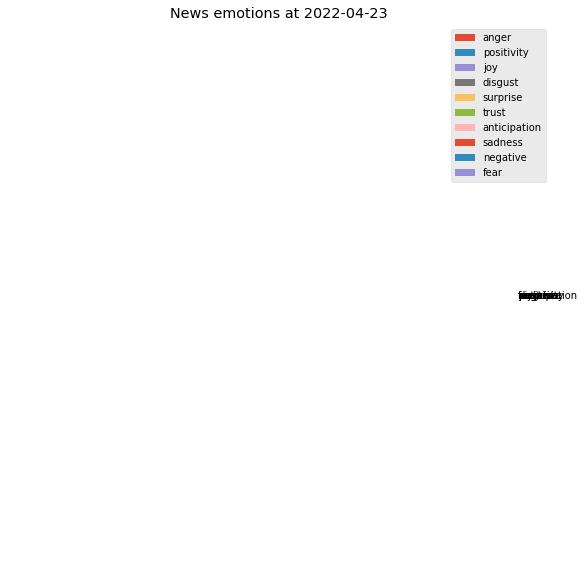

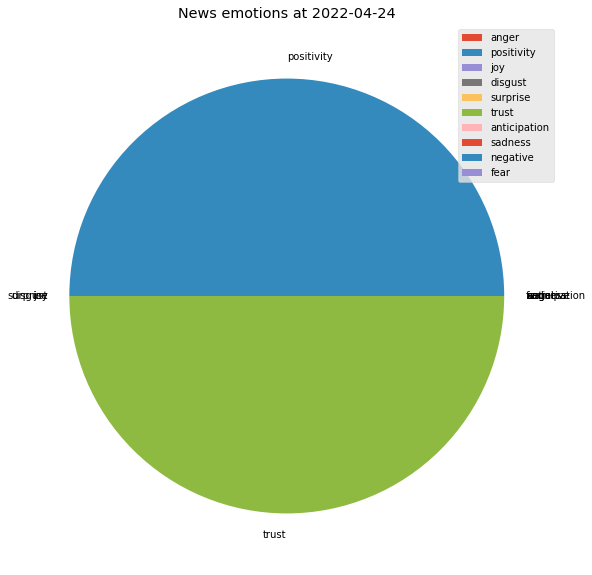

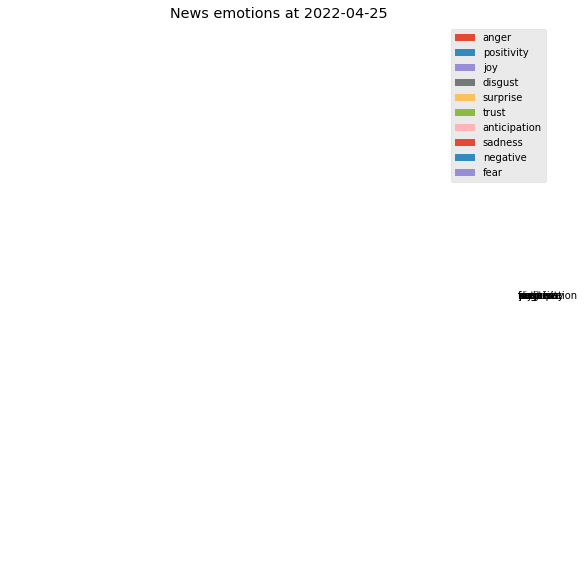

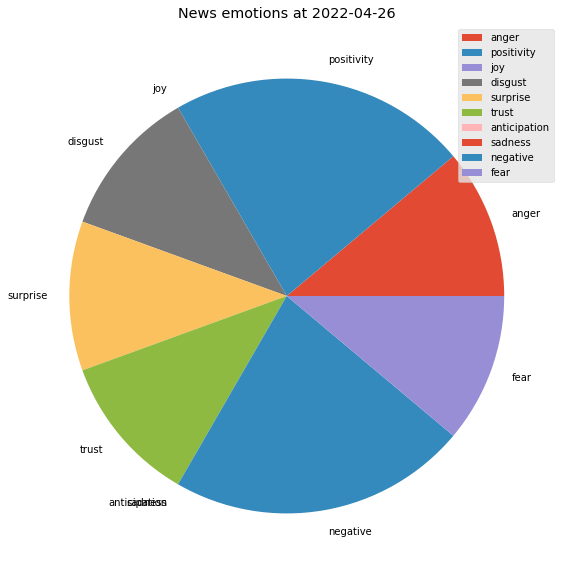

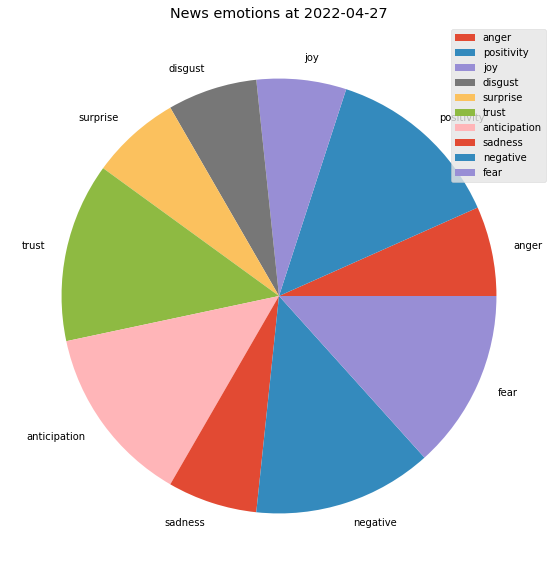

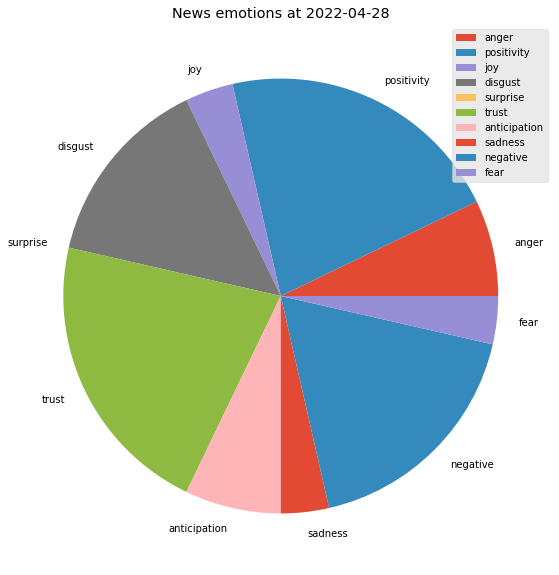

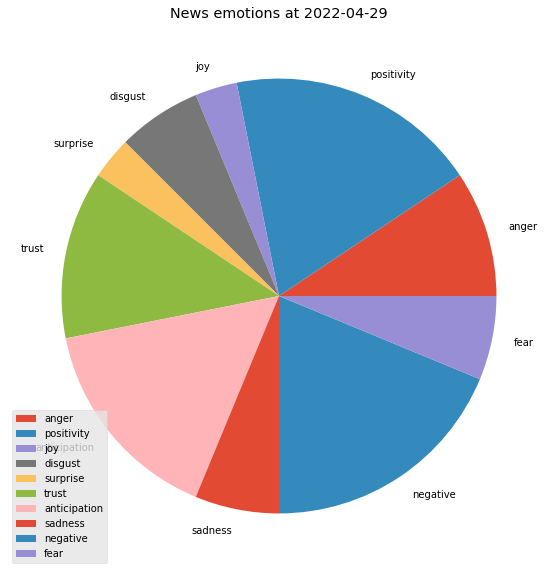

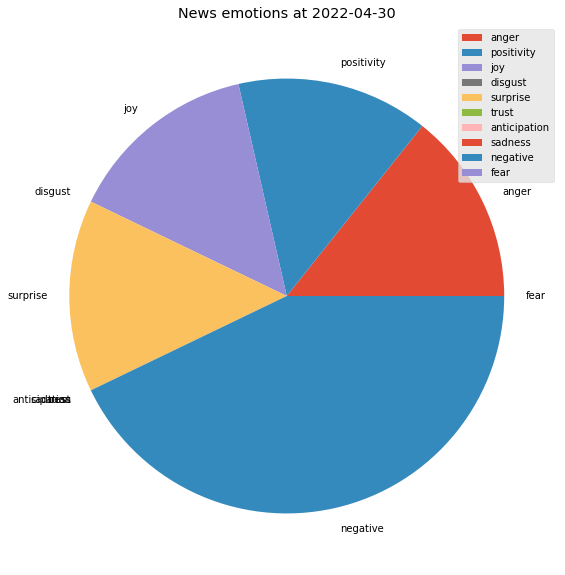

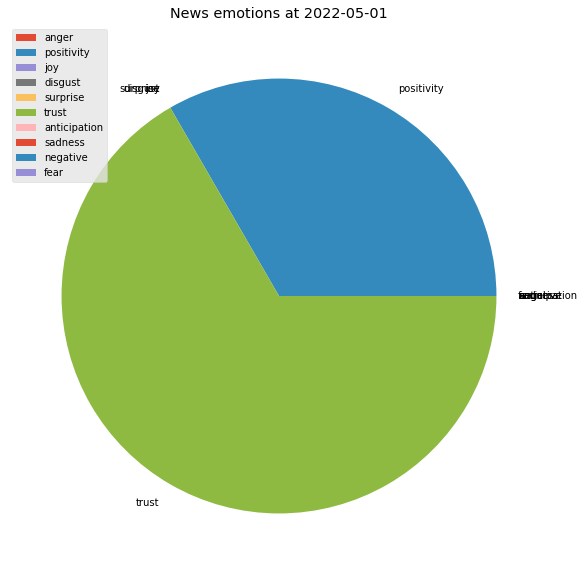

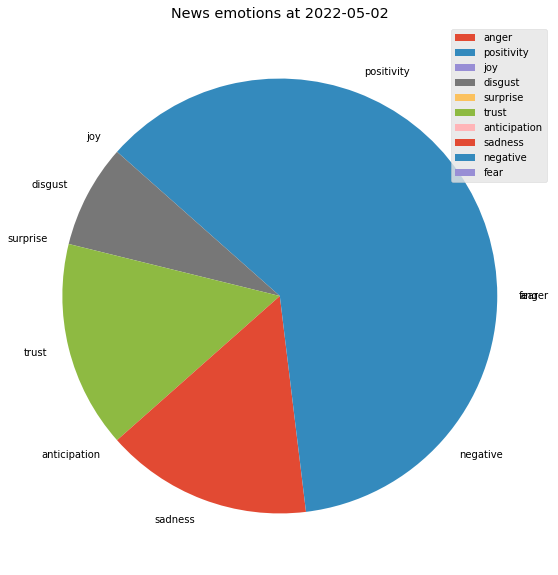

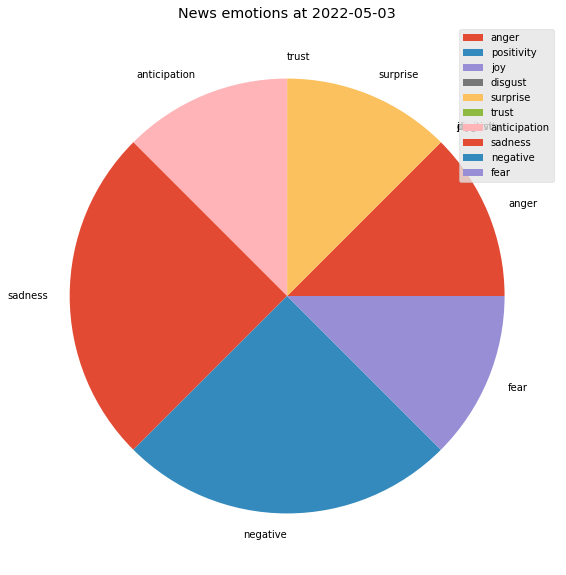

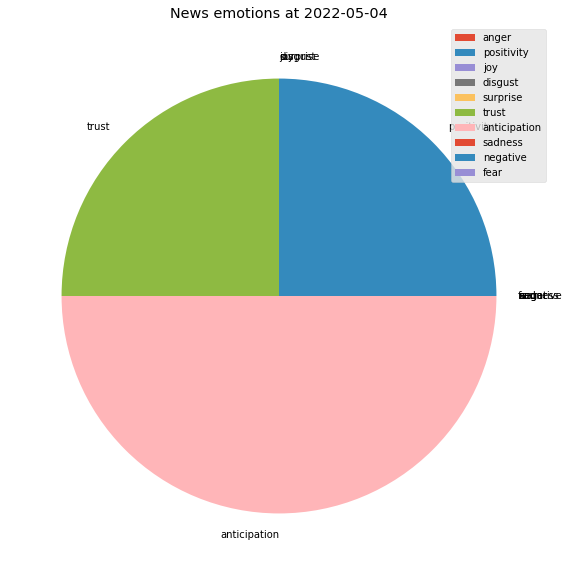

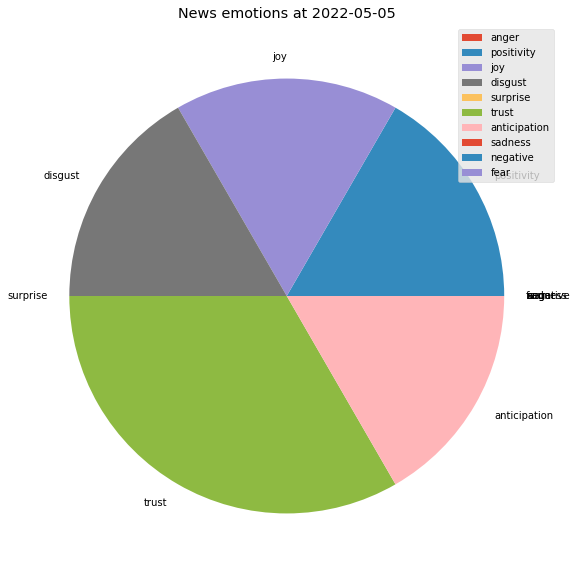

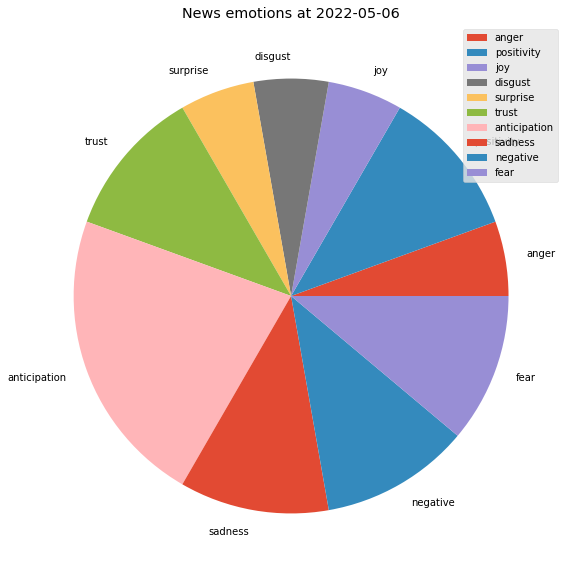

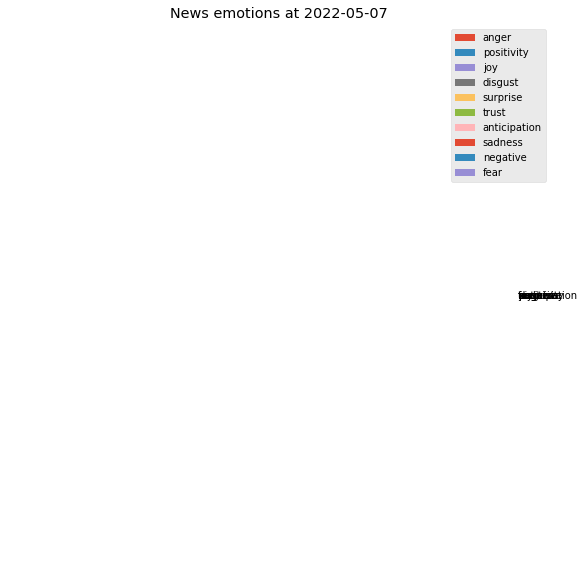

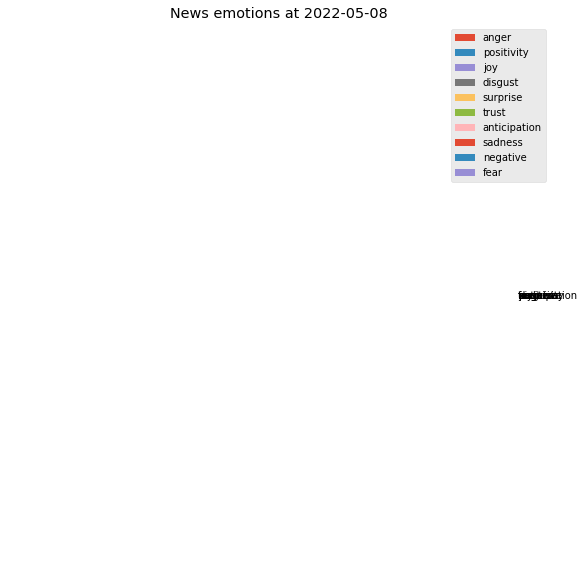

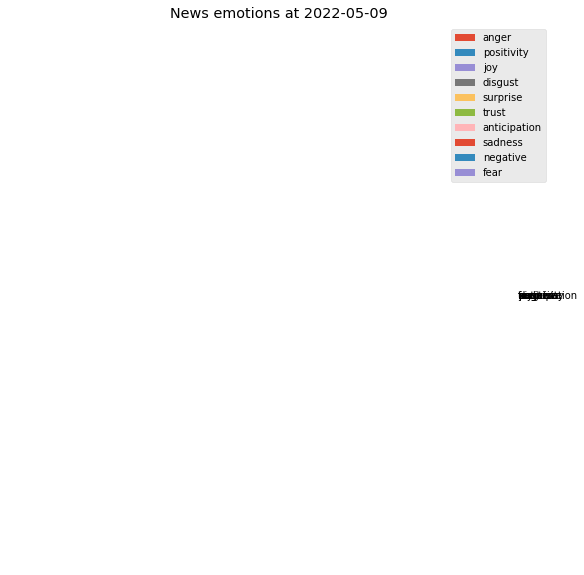

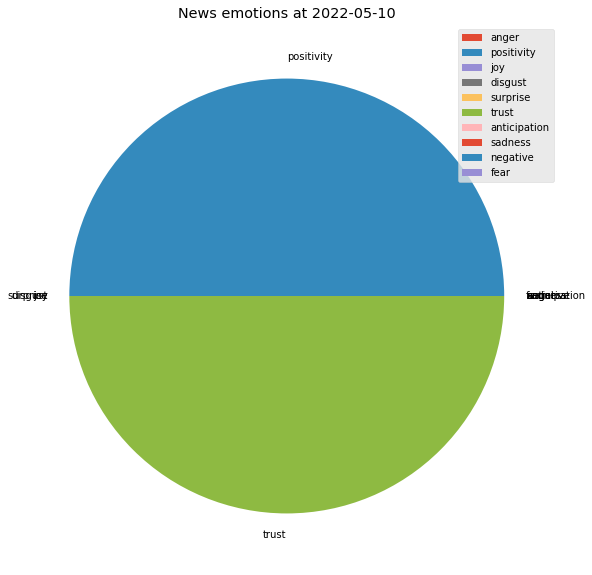

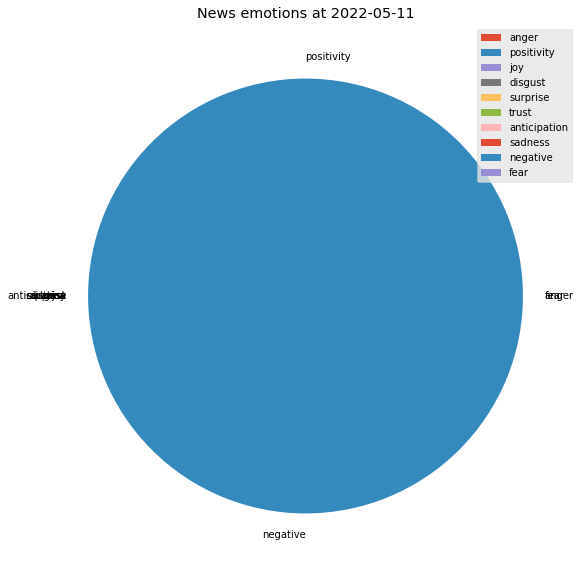

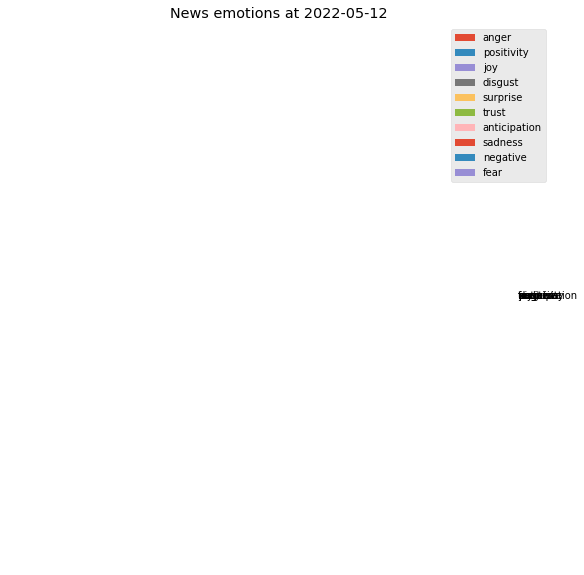

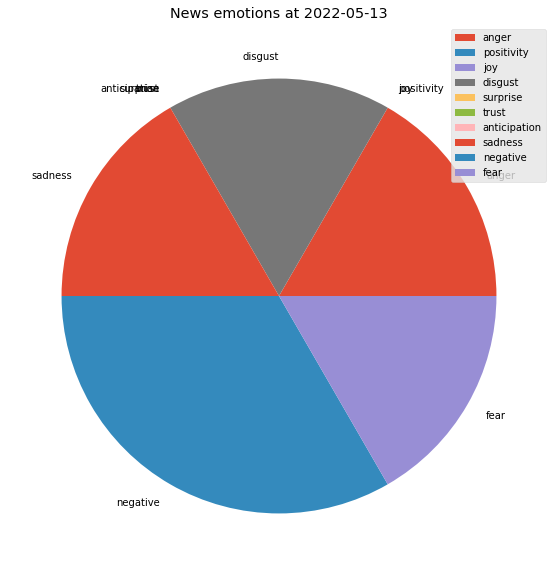

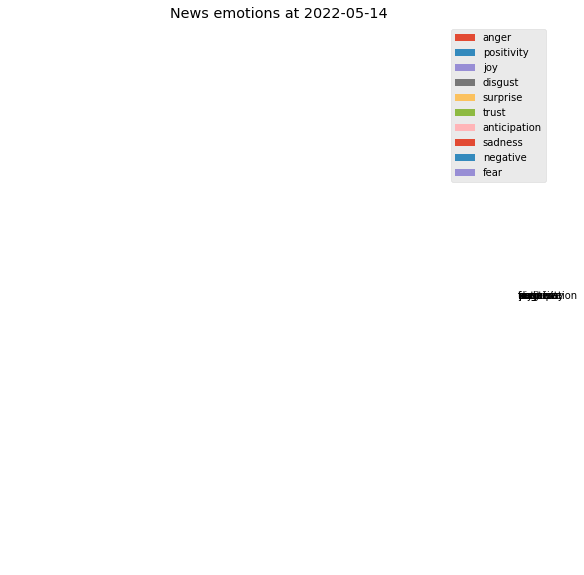

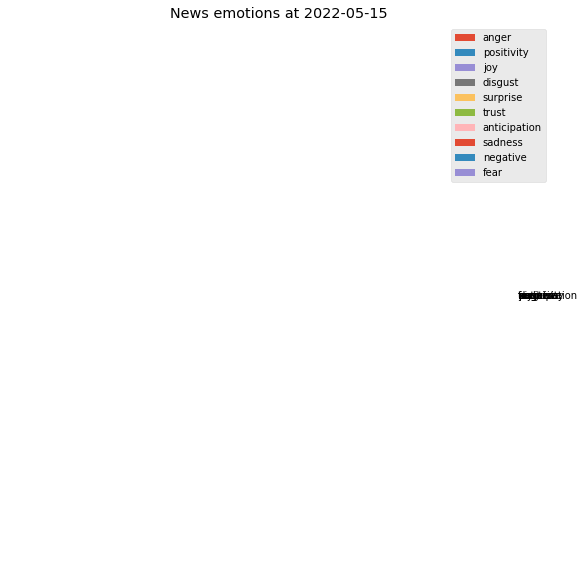

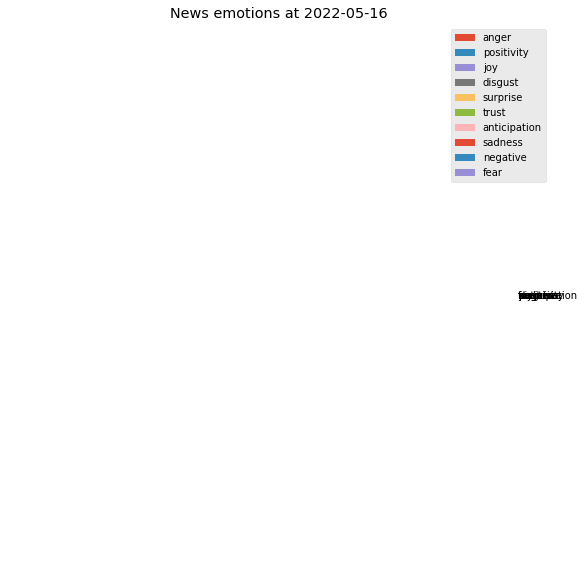

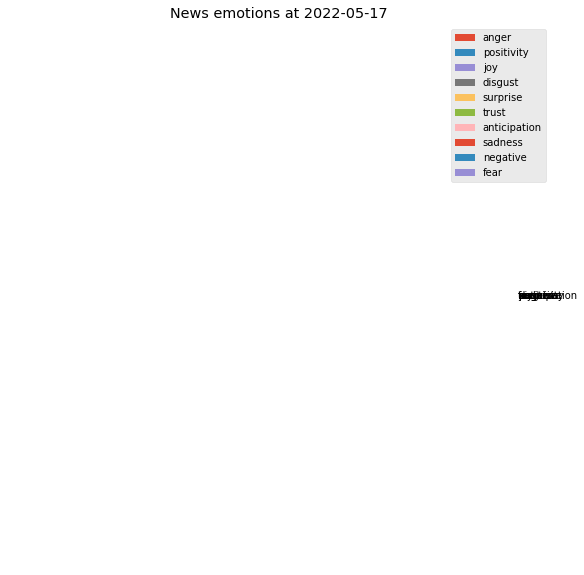

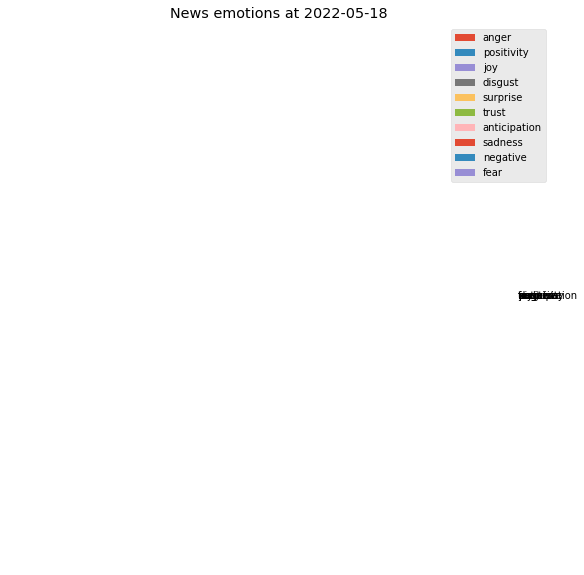

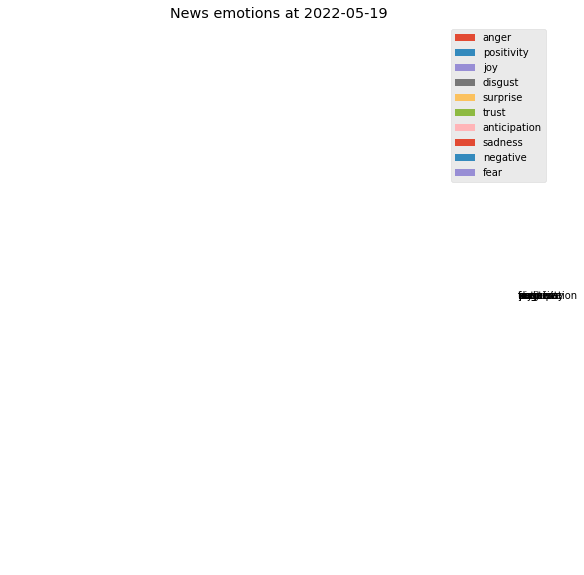

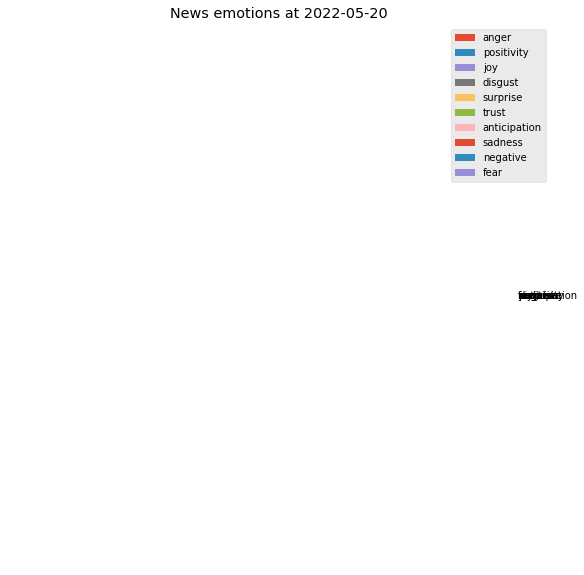

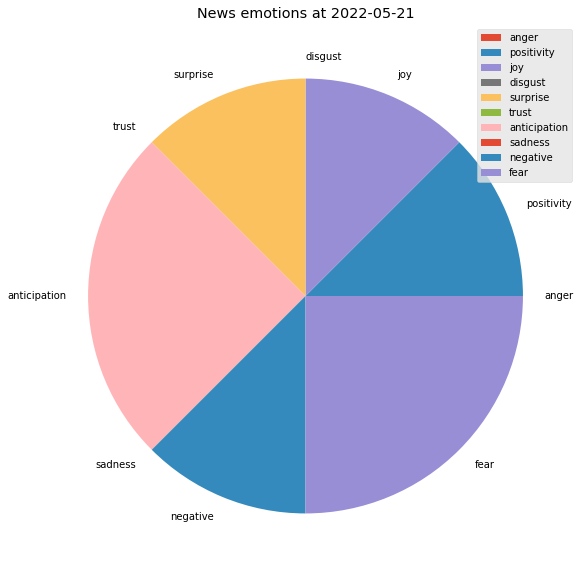

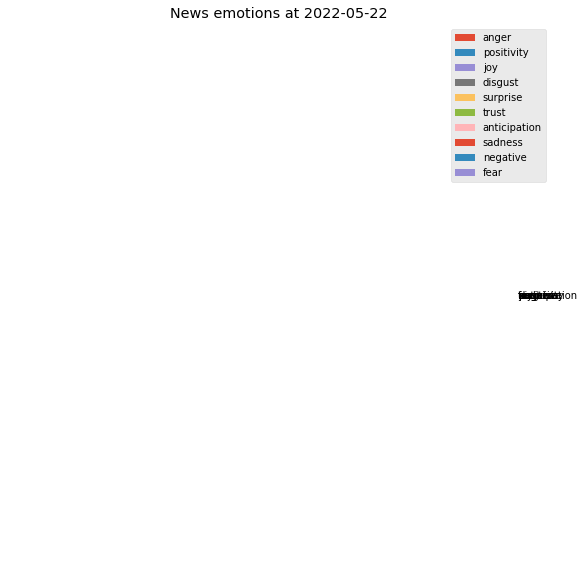

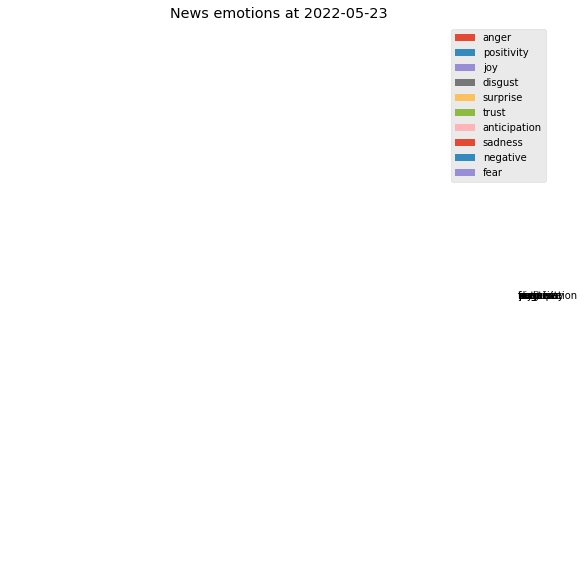

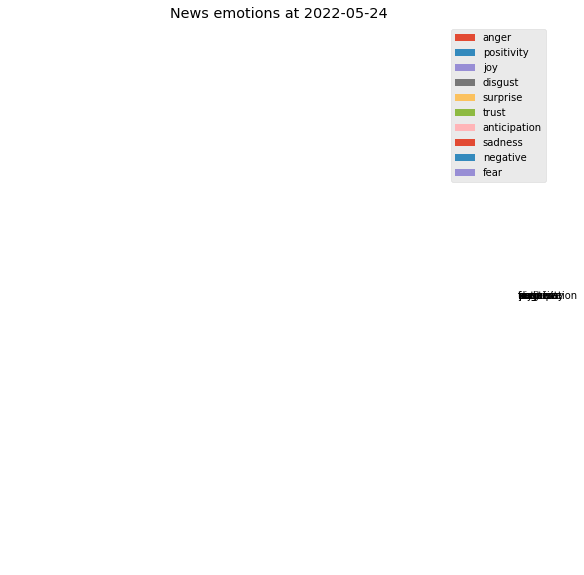

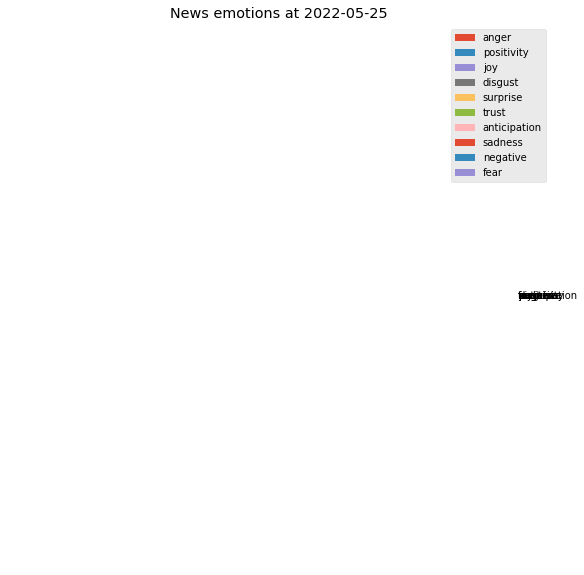

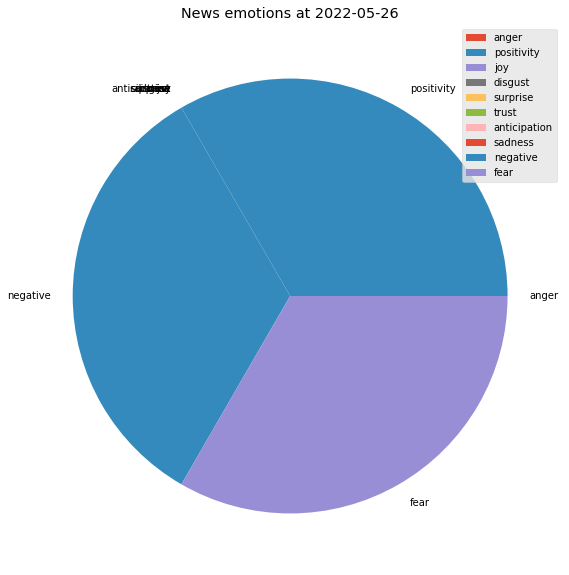

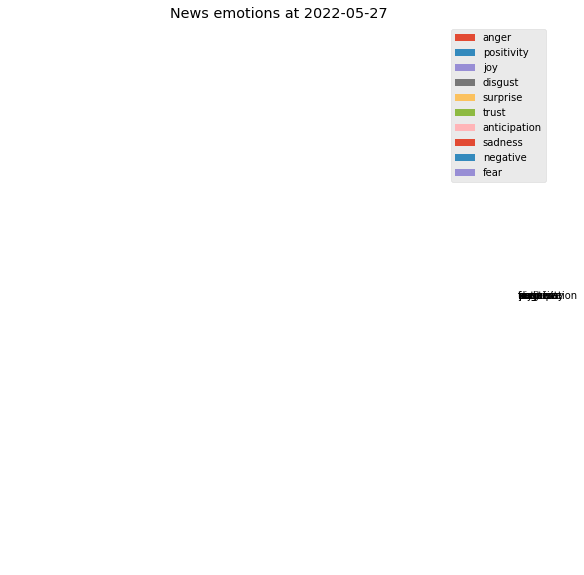

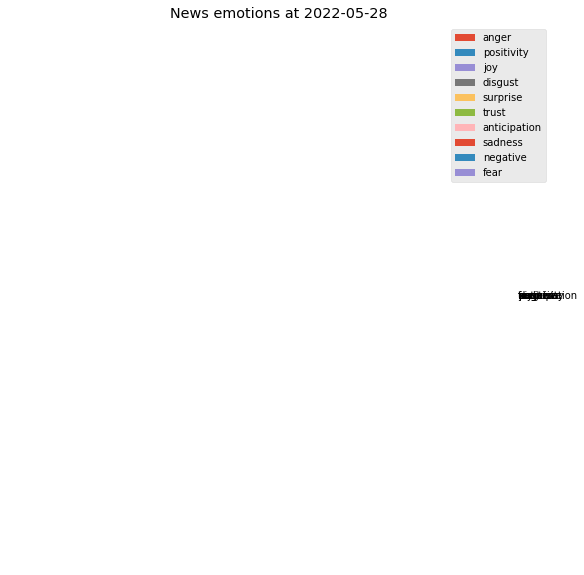

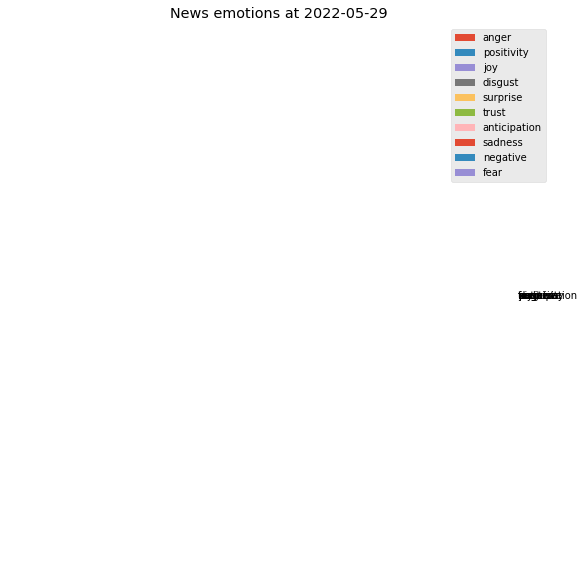

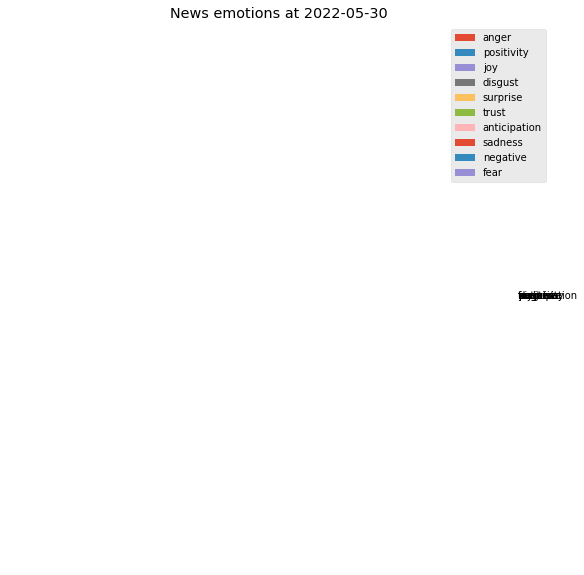

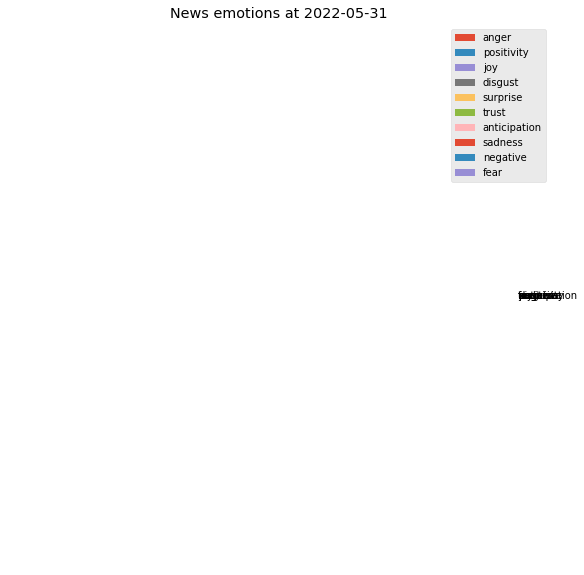

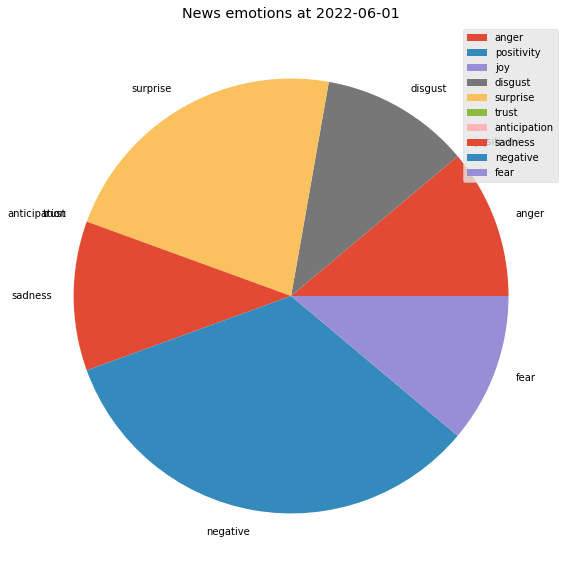

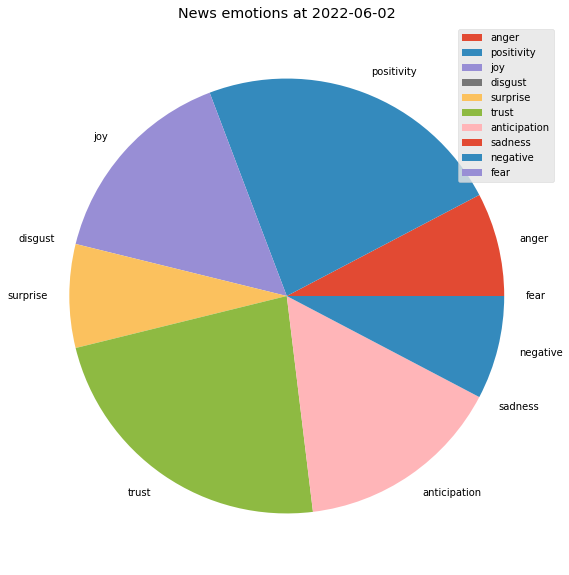

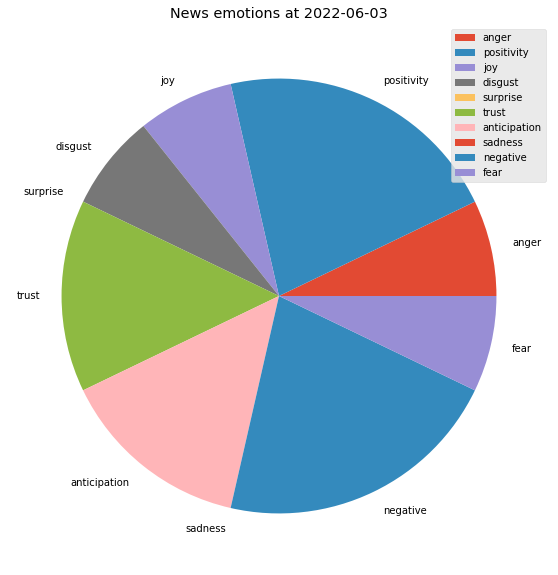

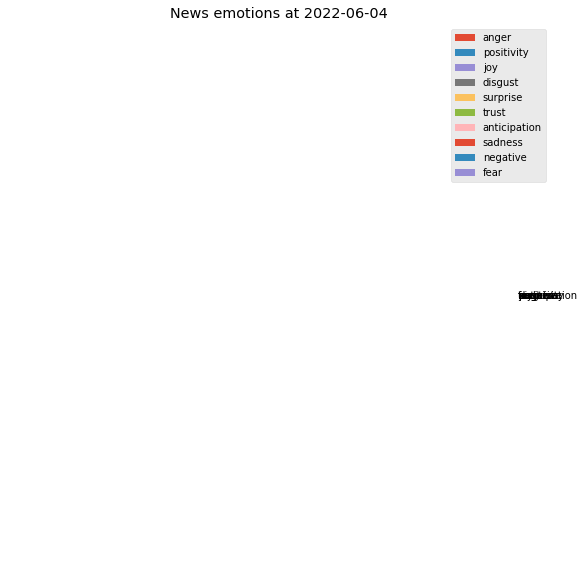

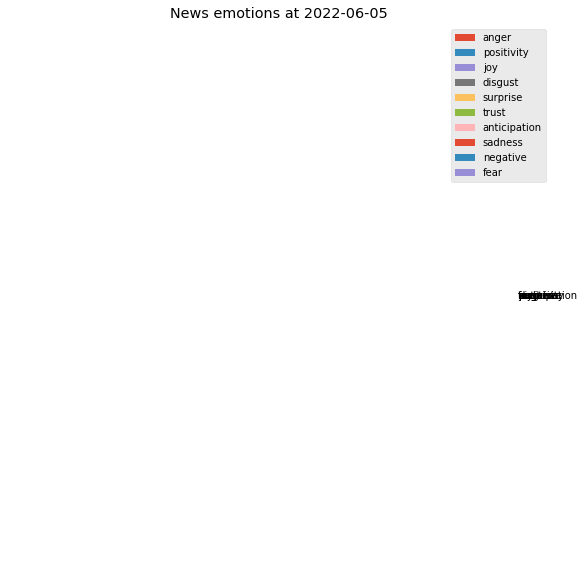

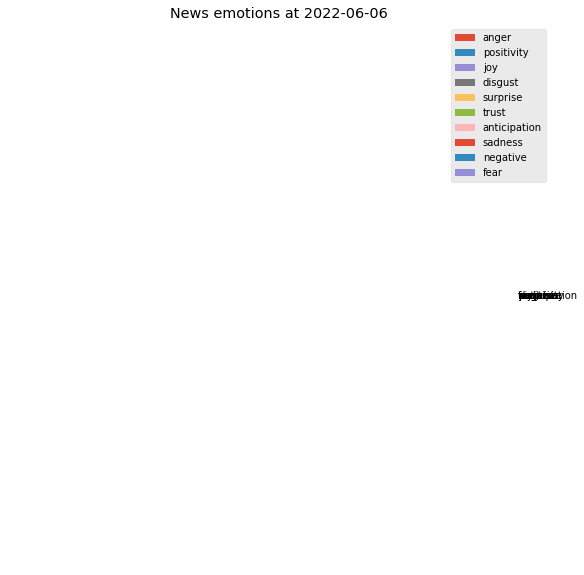

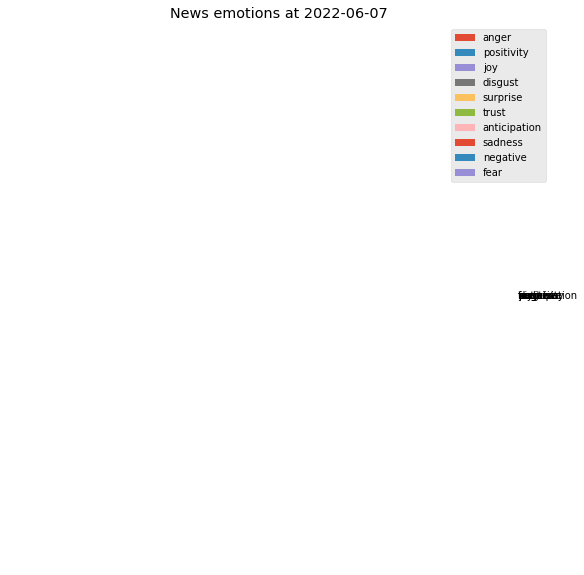

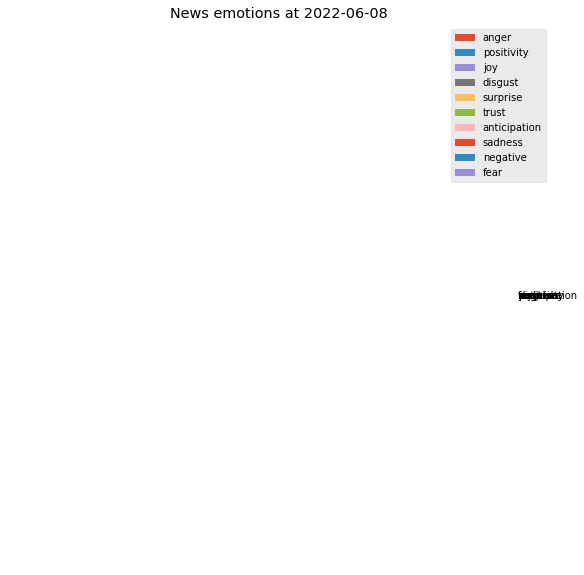

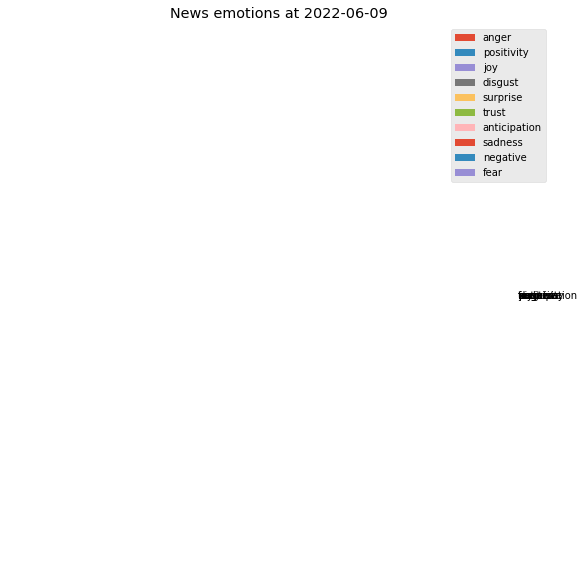

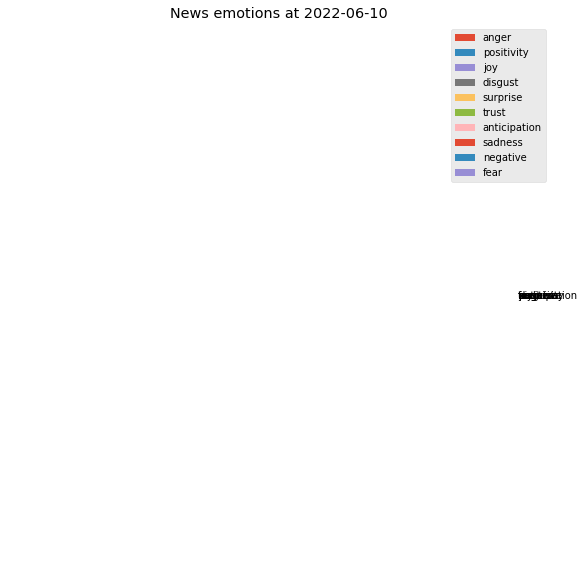

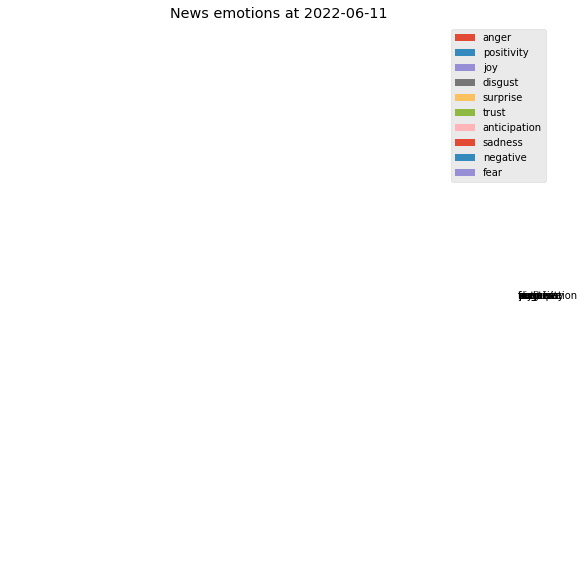

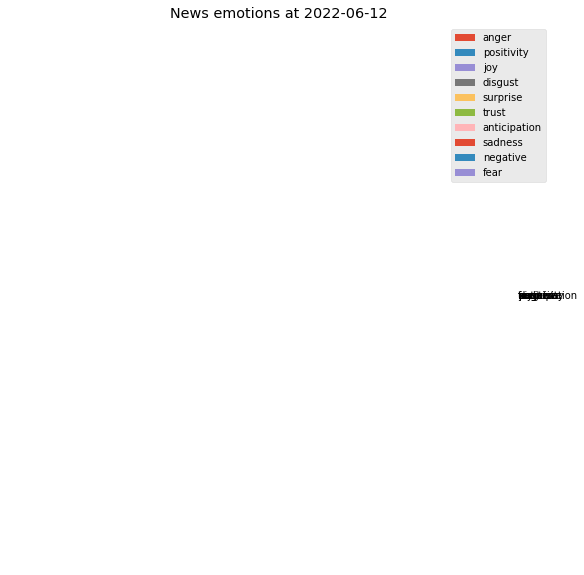

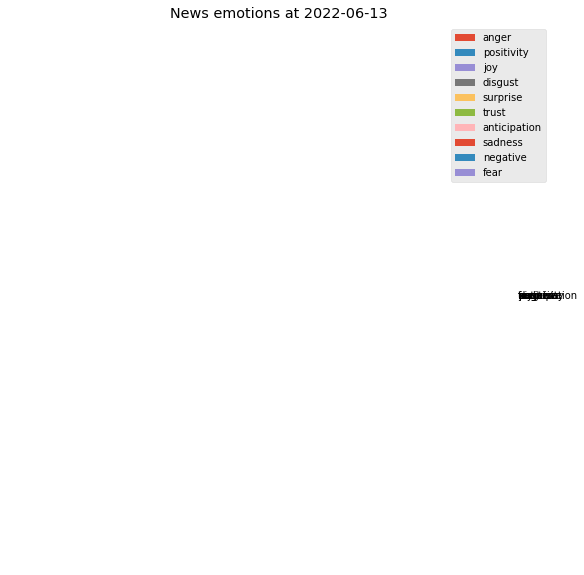

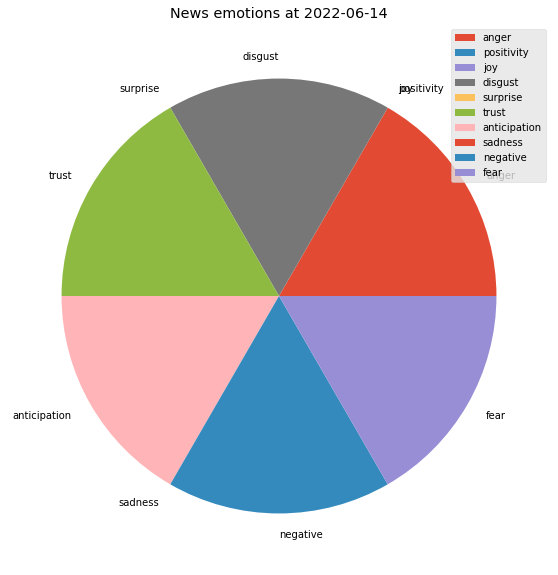

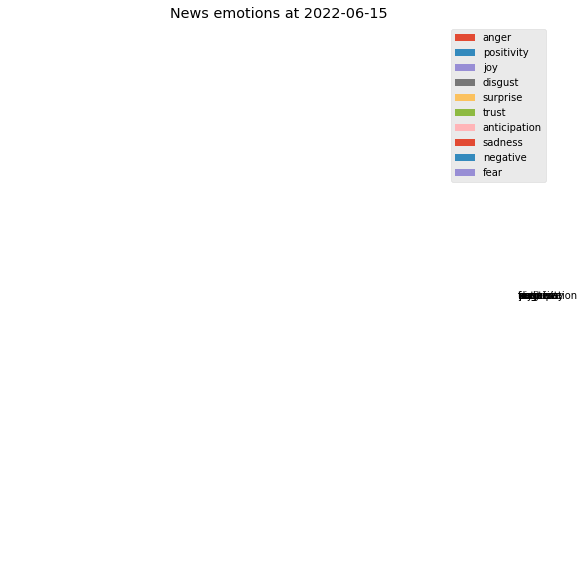

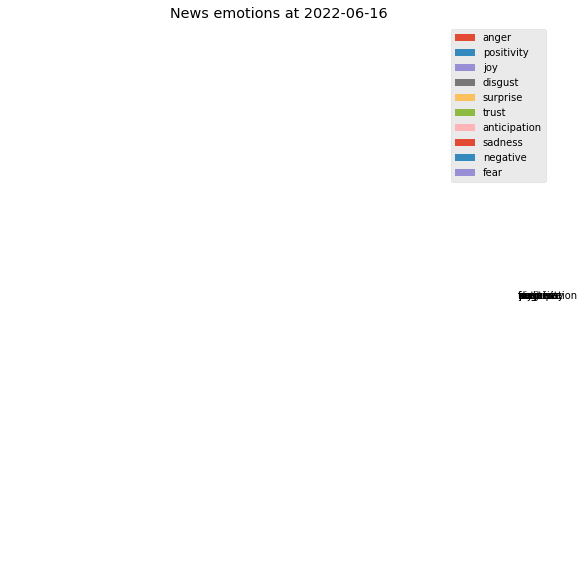

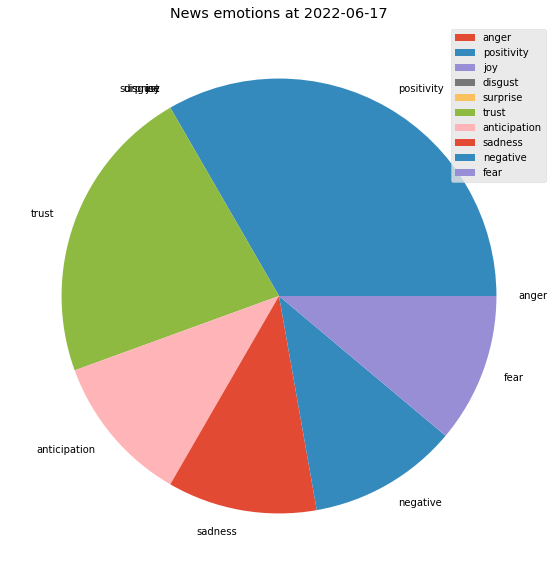

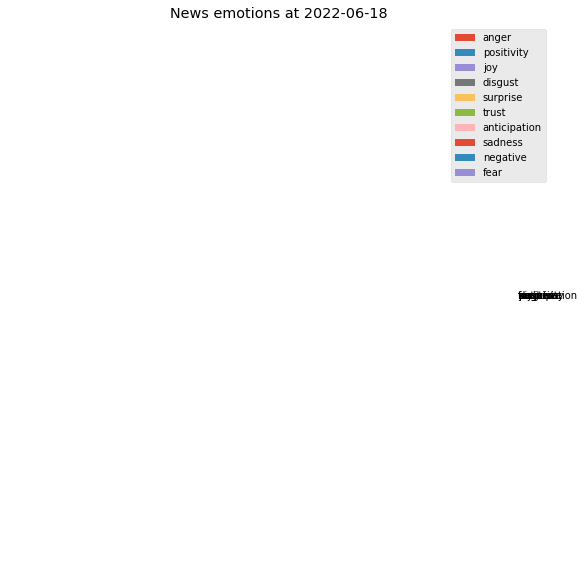

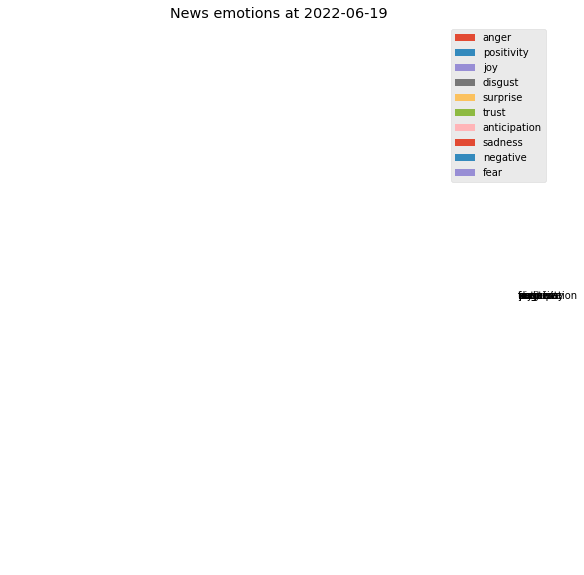

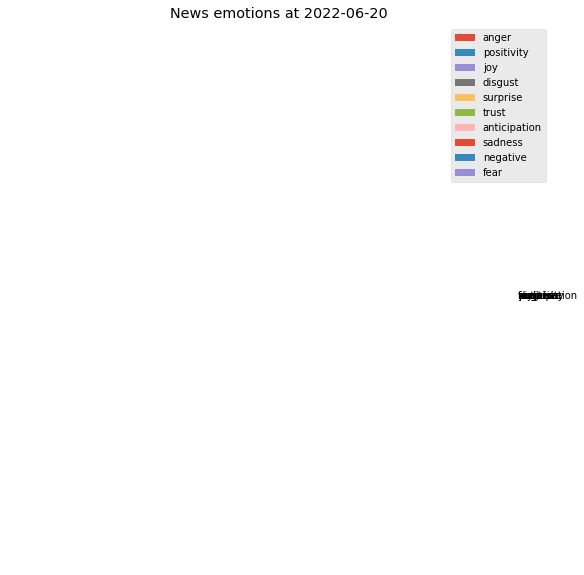

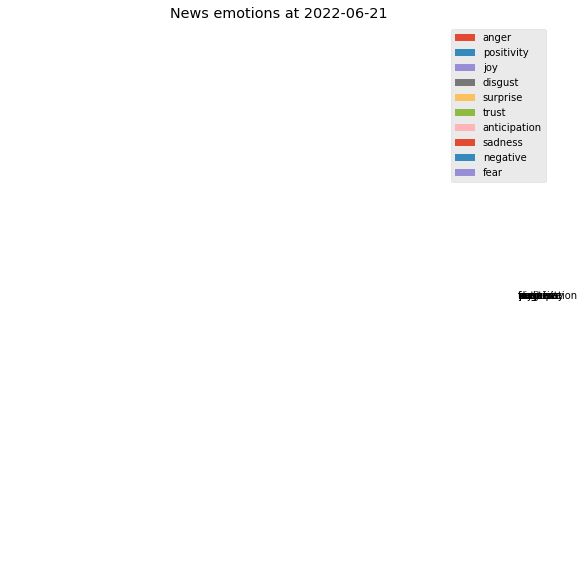

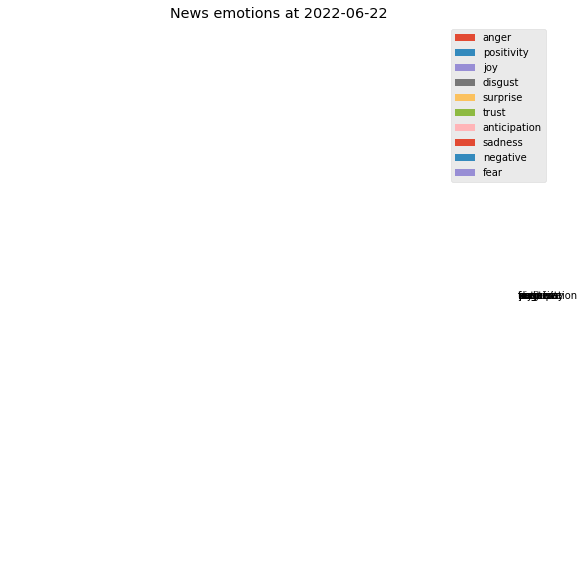

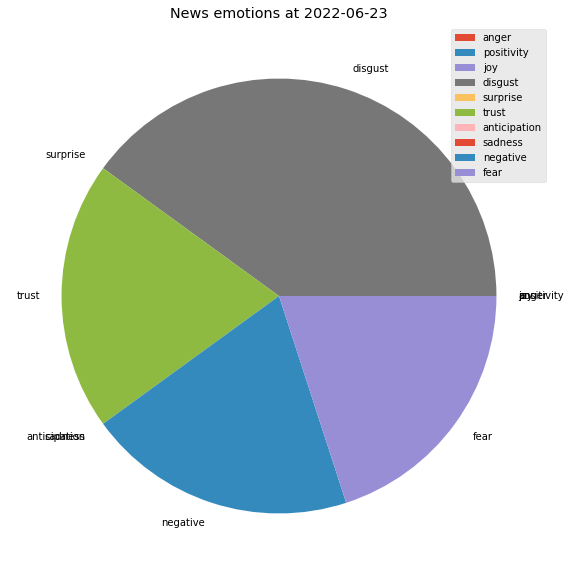

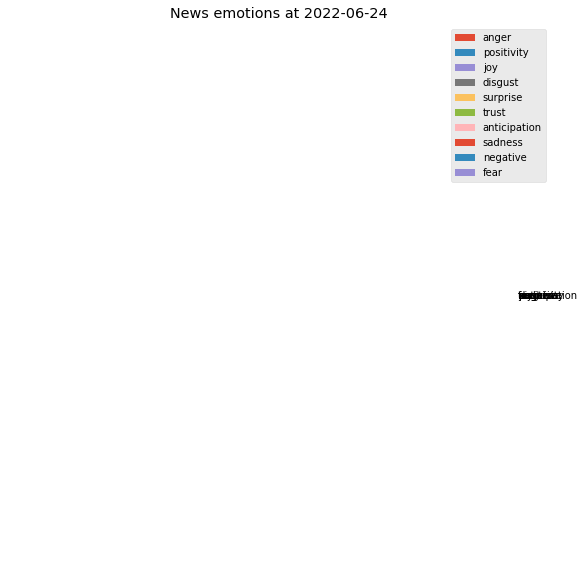

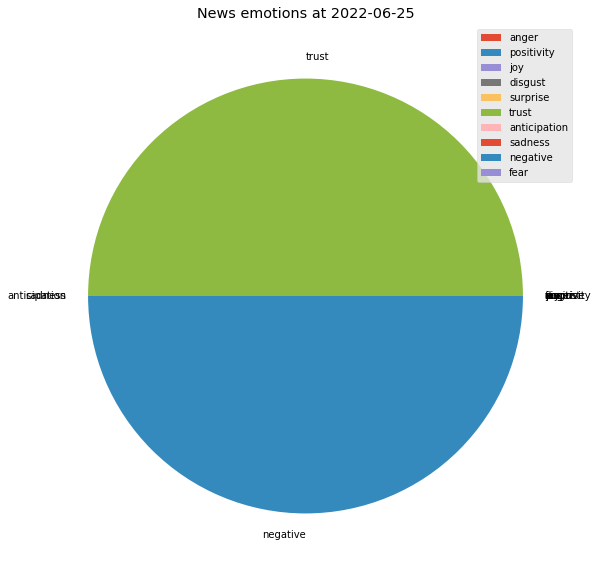

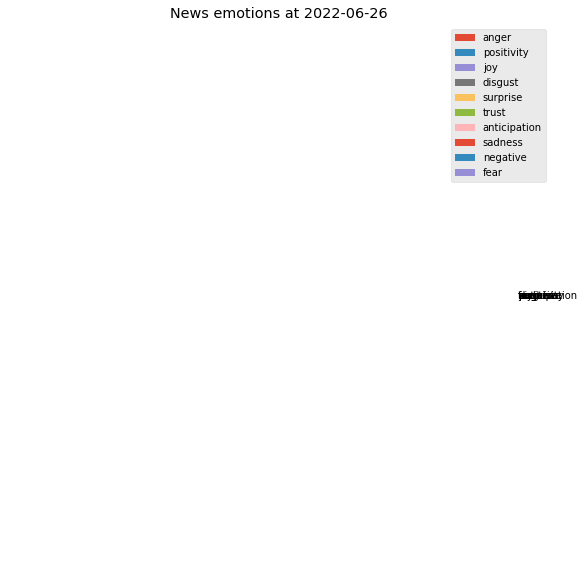

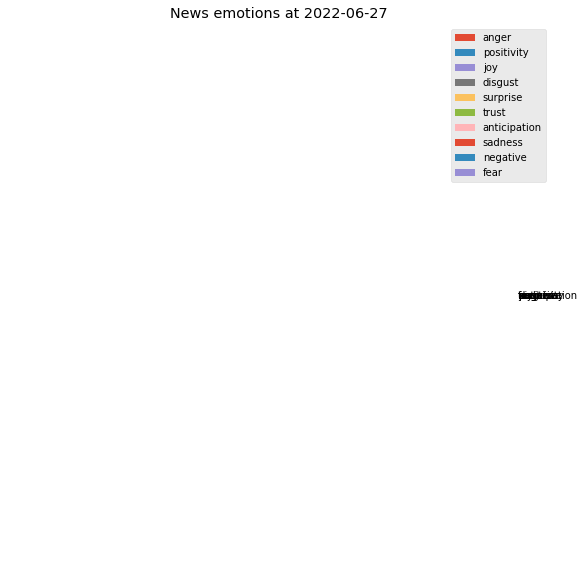

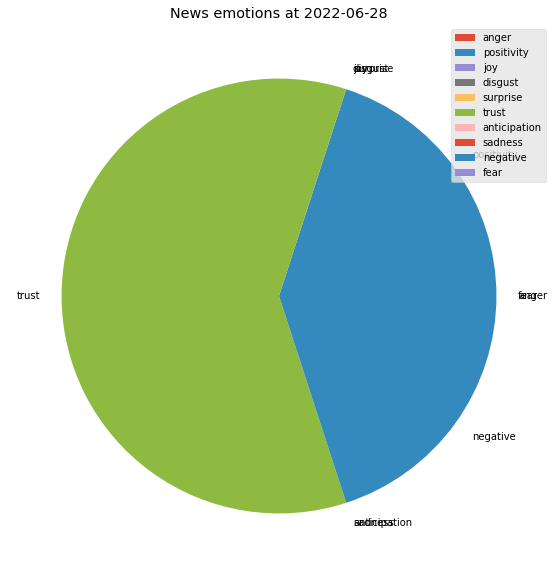

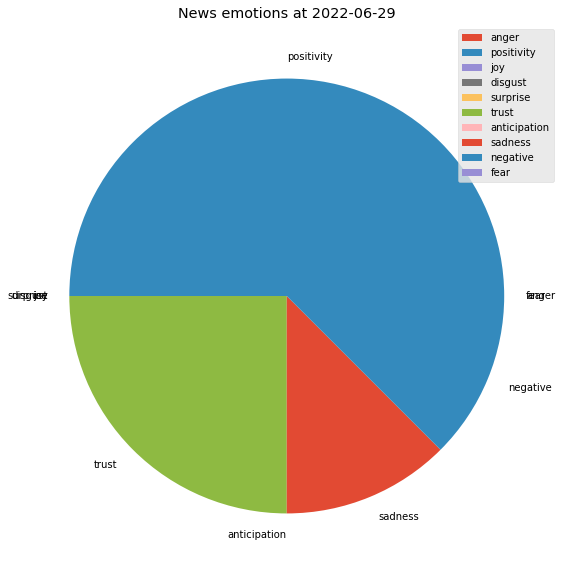

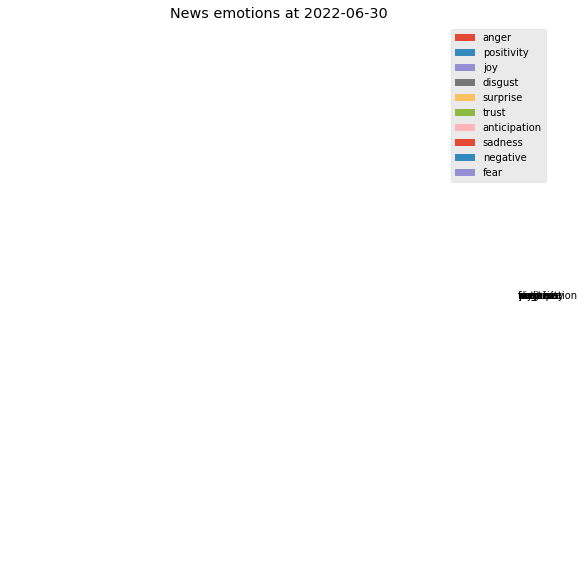

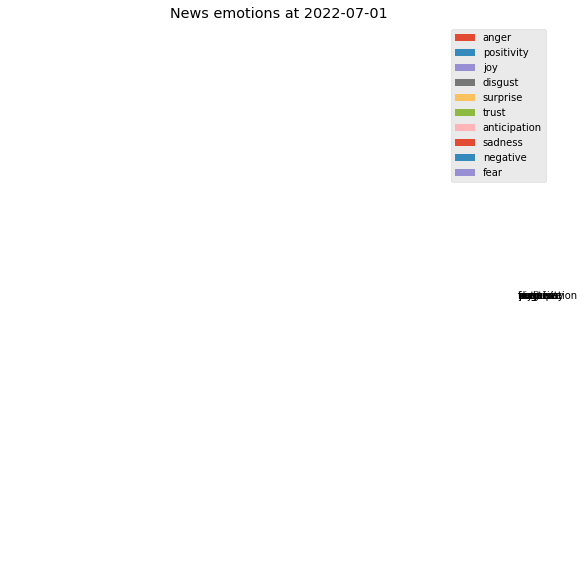

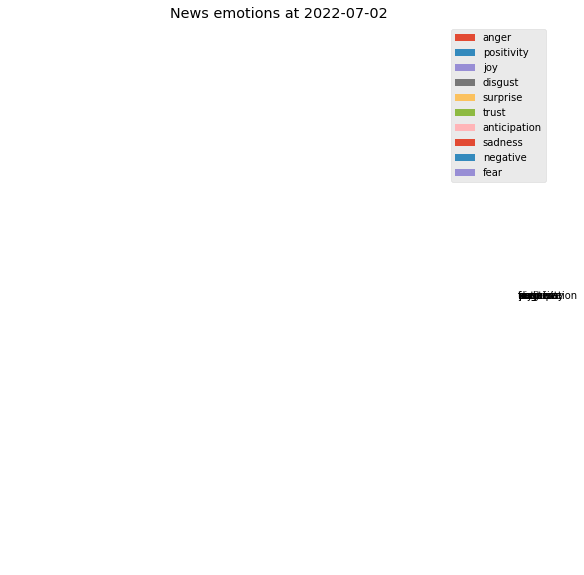

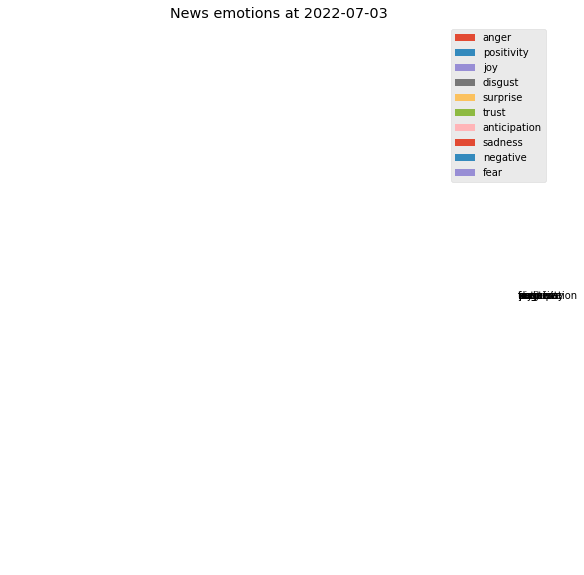

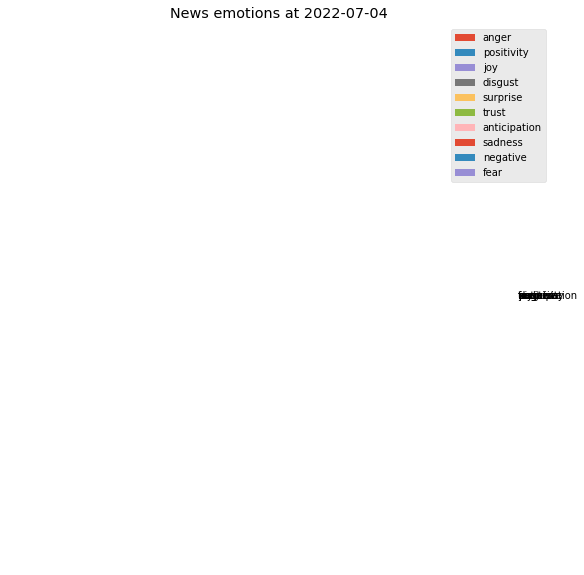

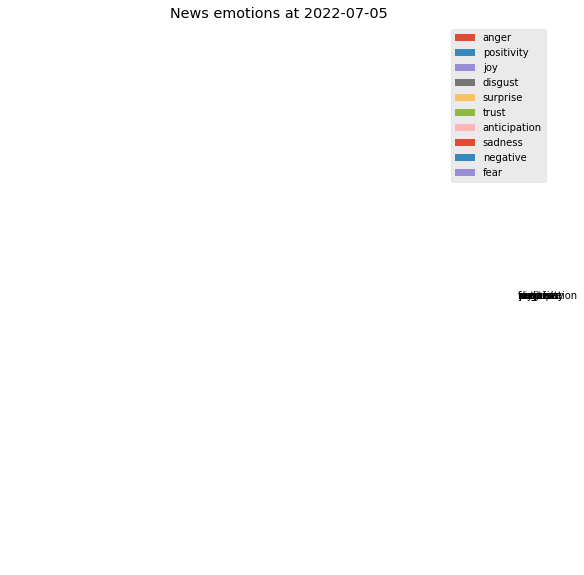

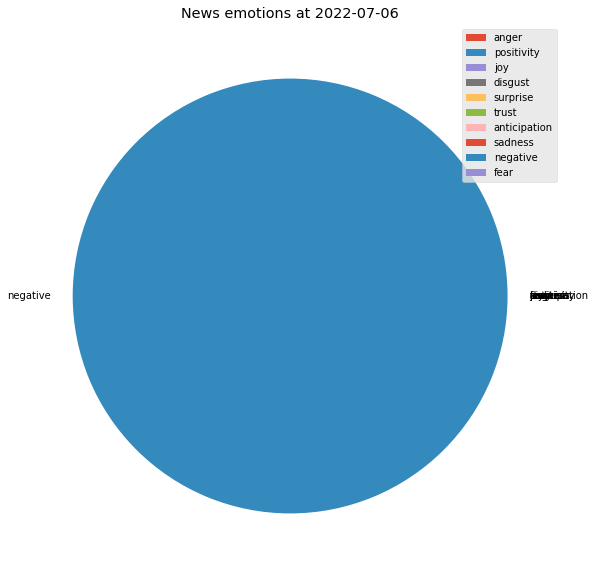

In [45]:
(rows,_) = emotions.shape
labels = emotions.columns

for i in range(rows):
    data = emotions.iloc[[i]].values[0].tolist()
    date = str(emotions.iloc[[i]].axes[0].values[0]).split('T')[0]
    plt.figure(figsize=(30,10))
    plt.pie(data,labels=labels,)
    plt.legend()
    plt.title(f'News emotions at {date}')
    plt.show()



# Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
count_vector = cv.fit_transform(Dei_doc['text'])

In [48]:
count_vector.shape

(67, 741)

In [49]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,14ο,18,1η,20,2013,2021,2022,2023,...,όριά,όρο,όρος,όσα,όσους,ότι,ότου,όχι,ύψος,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
import spacy

In [51]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 25.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [52]:
nlp = spacy.load('el_core_news_sm')

In [53]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [54]:
count_vector = cv.fit_transform(Dei_doc['text'])

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(Dei_doc['text'])  #finds the tfidf score with normalization


In [57]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,14ο,18,1η,20,2013,2021,2022,2023,...,χρηματοδοτηθούν,χρονικό,χρόνια,χρόνο,χυδαία,χώρα,χώρας,ψάρι,όριά,όρο
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318617,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.03022645 0.         0.         0.27548026 0.         0.05347094
  0.11195046 0.02721853 0.32807149 0.         0.         0.
  0.         0.27335878 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.0325     0.         0.
  0.03019473 0.03218087 0.         0.         0.02873414 0.
  0.         0.         0.         0.         0.         0.03288027
  0.         0.         0.         0.         0.03401172 0.
  0.0321814  0.         0.         0.         0.         0.
  0.1112142 ]]


In [59]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.1112142 ]
 [0.         1.         0.05902585 ... 0.         0.         0.        ]
 [0.         0.05902585 1.         ... 0.         0.         0.06990774]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.1112142  0.         0.06990774 ... 0.         0.         1.        ]]


In [60]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

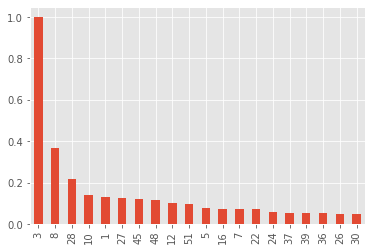

In [61]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

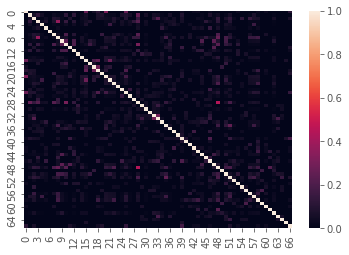

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
ax = sns.heatmap(arr)

